### Examining North Atlantic warming/cooling runs

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm
from dask.distributed import Client
import xarray as xr
import xgcm
from xgcm import Grid


In [2]:
client = Client(n_workers=8)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/39725/status,
Dashboard: /proxy/39725/status,Workers: 8
Total threads: 16,Total memory: 250.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39925,Workers: 8
Dashboard: /proxy/39725/status,Total threads: 16
Started: Just now,Total memory: 250.00 GiB
Comm: tcp://127.0.0.1:36495,Total threads: 2
Dashboard: /proxy/40833/status,Memory: 31.25 GiB
Nanny: tcp://127.0.0.1:38403,


In [3]:
expt_cont = '1deg_jra55_ryf_RCPcont'
expt_cool = '1deg_jra55_ryf_RCPcoolhumid'
expt_warm = '1deg_jra55_ryf_RCPwarmhumid'
expt_NAcool = '1deg_jra55_ryf_RCPcoolhumid_NA'
expt_NAwarm = '1deg_jra55_ryf_RCPwarmhumid_NA'
expt_IPcool = '1deg_jra55_ryf_RCPcoolhumid_IP'
expt_IPwarm = '1deg_jra55_ryf_RCPwarmhumid_IP'

session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_2022.db')


In [4]:
# files:
base = '/scratch/e14/cy8964/access-om2/archive/1deg_jra55_ryf_';
# ---------------------------------------------------------------------------------- #
nr_outputs = 5    # define number of output files to consider
last_output = 104  # the last output to consider loading in
# ---------------------------------------------------------------------------------- #
a = [i for i in range(last_output+1-nr_outputs,last_output+1)] # create integer list
s = list(range(0,nr_outputs))
c = [] # empty list which I fill up
d = []
e = []
f = []
g = []
h = []
j = []

for i in s: # loop through the number of files I would like
    c.append(i)
    d.append(i)
    e.append(i)
    f.append(i)
    g.append(i)
    h.append(i)
    j.append(i)
    
    # fill in empty list with integers trailing two zeros (000, 001, 002, ...)
    c[i] = base+'RCPcont/output'+str(a[i]).zfill(3) + '/ocean/ocean.nc' 
    d[i] = base+'RCPcoolhumid/output'+str(a[i]).zfill(3) + '/ocean/ocean.nc' 
    e[i] = base+'RCPwarmhumid/output'+str(a[i]).zfill(3) + '/ocean/ocean.nc' 
    f[i] = base+'RCPwarmhumid_NA/output'+str(a[i]).zfill(3) + '/ocean/ocean.nc' 
    g[i] = base+'RCPwarmhumid_IP/output'+str(a[i]).zfill(3) + '/ocean/ocean.nc' 
    h[i] = base+'RCPcoolhumid_NA/output'+str(a[i]).zfill(3) + '/ocean/ocean.nc' 
    j[i] = base+'RCPcoolhumid_IP/output'+str(a[i]).zfill(3) + '/ocean/ocean.nc' 
    
# load in data set ----------------------------------------------------------------- #
ds_cont = xr.open_mfdataset(c,combine='by_coords',chunks={'time': 1},decode_times = True)
ds_cool = xr.open_mfdataset(d,combine='by_coords',chunks={'time': 1},decode_times = True)
ds_warm = xr.open_mfdataset(e,combine='by_coords',chunks={'time': 1},decode_times = True)
ds_warmNA = xr.open_mfdataset(f,combine='by_coords',chunks={'time': 1},decode_times = True)
ds_warmIP = xr.open_mfdataset(g,combine='by_coords',chunks={'time': 1},decode_times = True)
ds_coolNA = xr.open_mfdataset(h,combine='by_coords',chunks={'time': 1},decode_times = True)
ds_coolIP = xr.open_mfdataset(j,combine='by_coords',chunks={'time': 1},decode_times = True)


In [5]:
# files:
base = '/scratch/e14/cy8964/access-om2/archive/1deg_jra55_ryf_';
# ---------------------------------------------------------------------------------- #
nr_outputs = 5    # define number of output files to consider
last_output = 104  # the last output to consider loading in
# ---------------------------------------------------------------------------------- #
a = [i for i in range(last_output+1-nr_outputs,last_output+1)] # create integer list
s = list(range(0,nr_outputs))
c = [] # empty list which I fill up
d = []
e = []
f = []
g = []
h = []
j = []

for i in s: # loop through the number of files I would like
    c.append(i)
    d.append(i)
    e.append(i)
    f.append(i)
    g.append(i)
    h.append(i)
    j.append(i)
    
    # fill in empty list with integers trailing two zeros (000, 001, 002, ...)
    c[i] = base+'RCPcont/output'+str(a[i]).zfill(3) + '/ocean/ocean_month.nc' 
    d[i] = base+'RCPcoolhumid/output'+str(a[i]).zfill(3) + '/ocean/ocean_month.nc' 
    e[i] = base+'RCPwarmhumid/output'+str(a[i]).zfill(3) + '/ocean/ocean_month.nc' 
    f[i] = base+'RCPwarmhumid_NA/output'+str(a[i]).zfill(3) + '/ocean/ocean_month.nc' 
    g[i] = base+'RCPwarmhumid_IP/output'+str(a[i]).zfill(3) + '/ocean/ocean_month.nc' 
    h[i] = base+'RCPcoolhumid_NA/output'+str(a[i]).zfill(3) + '/ocean/ocean_month.nc' 
    j[i] = base+'RCPcoolhumid_IP/output'+str(a[i]).zfill(3) + '/ocean/ocean_month.nc' 
    
# load in data set ----------------------------------------------------------------- #
ds2_cont = xr.open_mfdataset(c,combine='by_coords',chunks={'time': 1},decode_times = True)
ds2_cool = xr.open_mfdataset(d,combine='by_coords',chunks={'time': 1},decode_times = True)
ds2_warm = xr.open_mfdataset(e,combine='by_coords',chunks={'time': 1},decode_times = True)
ds2_warmNA = xr.open_mfdataset(f,combine='by_coords',chunks={'time': 1},decode_times = True)
ds2_warmIP = xr.open_mfdataset(g,combine='by_coords',chunks={'time': 1},decode_times = True)
ds2_coolNA = xr.open_mfdataset(h,combine='by_coords',chunks={'time': 1},decode_times = True)
ds2_coolIP = xr.open_mfdataset(j,combine='by_coords',chunks={'time': 1},decode_times = True)


In [6]:
fgrd = xr.open_dataset(base+'RCPcont/output100/ocean/ocean_grid.nc' )


# Plot surface temp anomalies

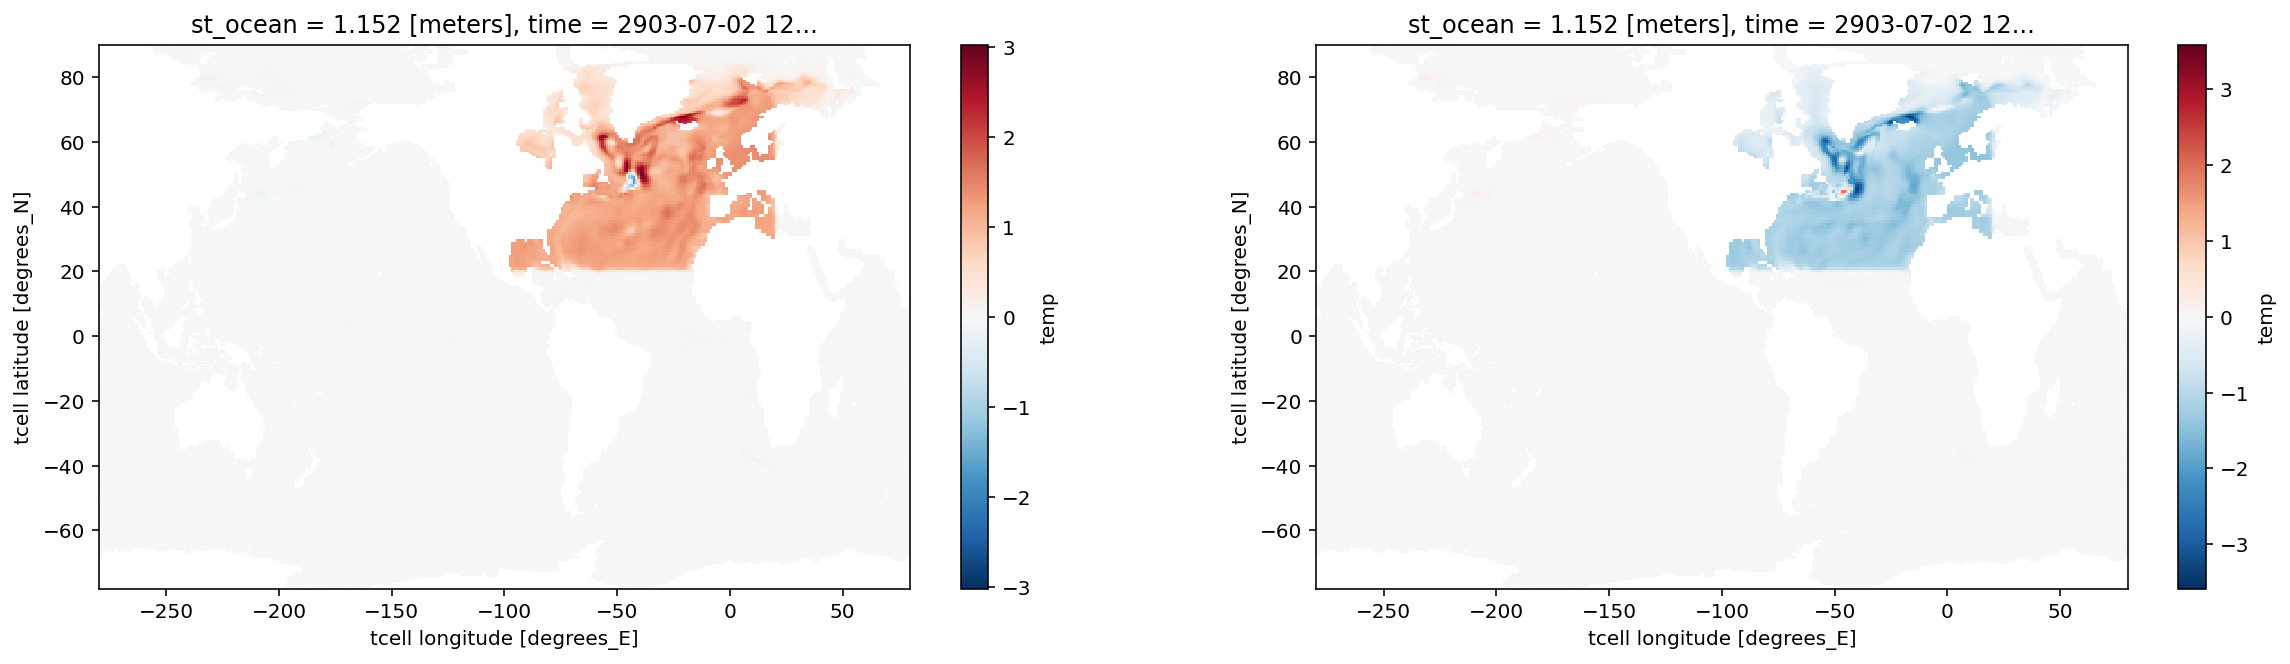

In [33]:
fig, axes = plt.subplots(figsize = (20,5),nrows = 1, ncols = 2)

(ds_warmNA.temp-ds_cont.temp).isel(time = 3).isel(st_ocean = 0).plot(ax = axes[0])
(ds_coolNA.temp-ds_cont.temp).isel(time = 3).isel(st_ocean = 0).plot(ax = axes[1])


# Plot heat content

In [30]:
rho_0 = 1030#kg/m^3
c_p = 3992 #J/kg/K

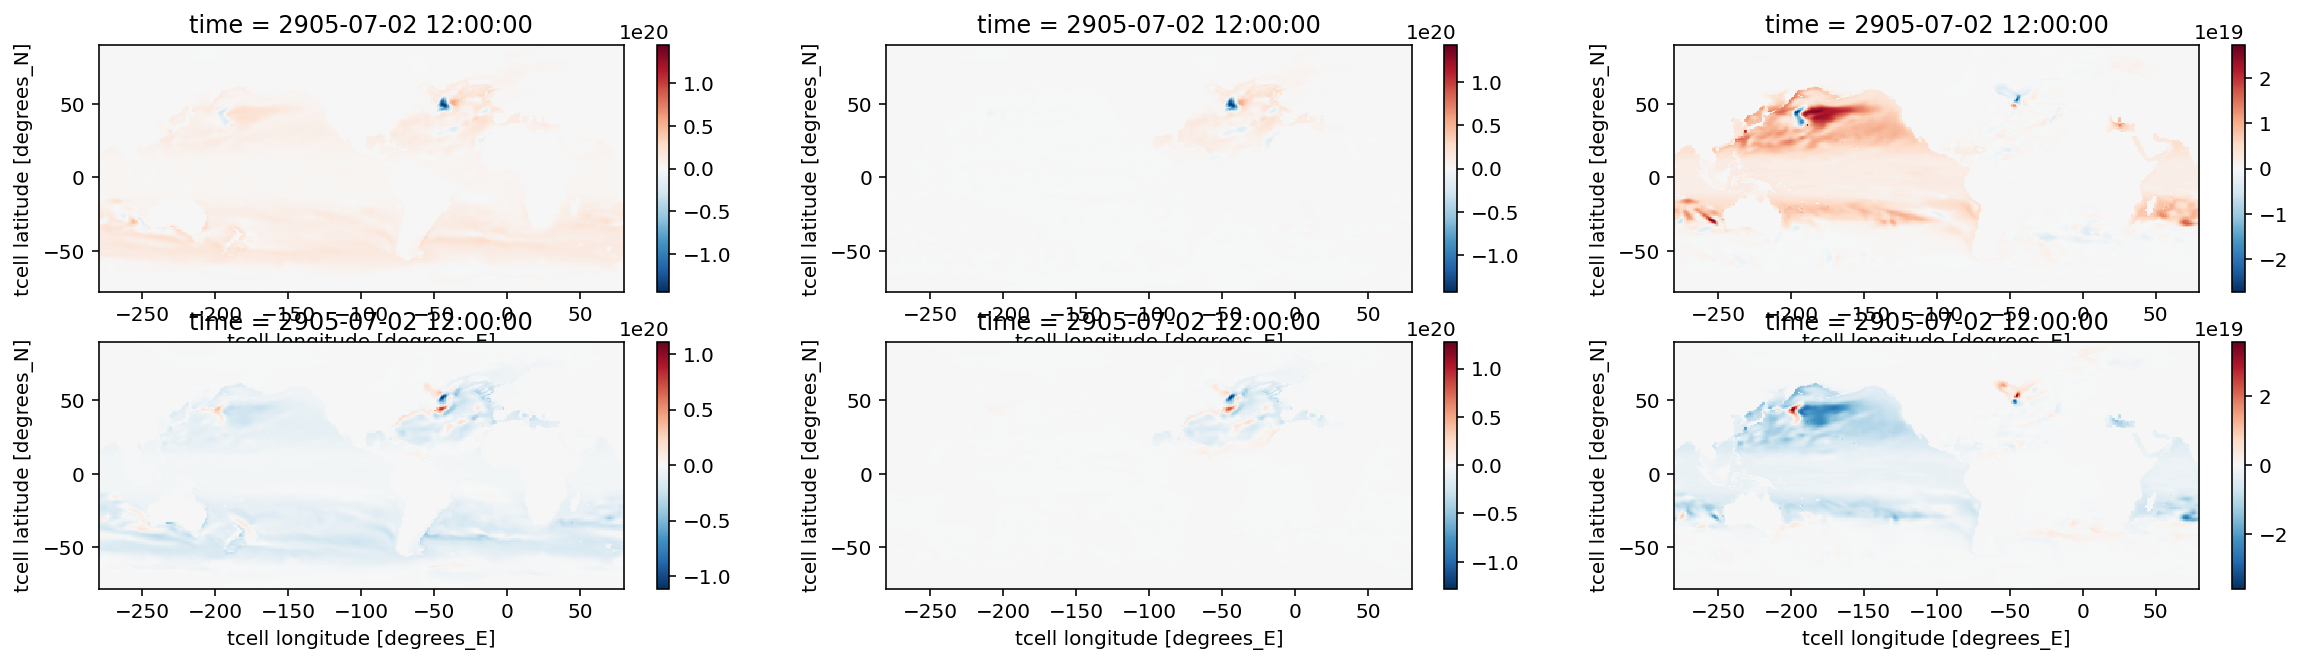

In [35]:
fig, axes = plt.subplots(figsize = (20,5), nrows = 2, ncols = 3)

time = 5
((ds_warm.temp*ds_warm.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[0,0])
((ds_cool.temp*ds_cool.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[1,0])

((ds_warmNA.temp*ds_warmNA.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[0,1])
((ds_coolNA.temp*ds_coolNA.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[1,1])

((ds_warmIP.temp*ds_warmIP.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[0,2])
((ds_coolIP.temp*ds_coolIP.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[1,2])



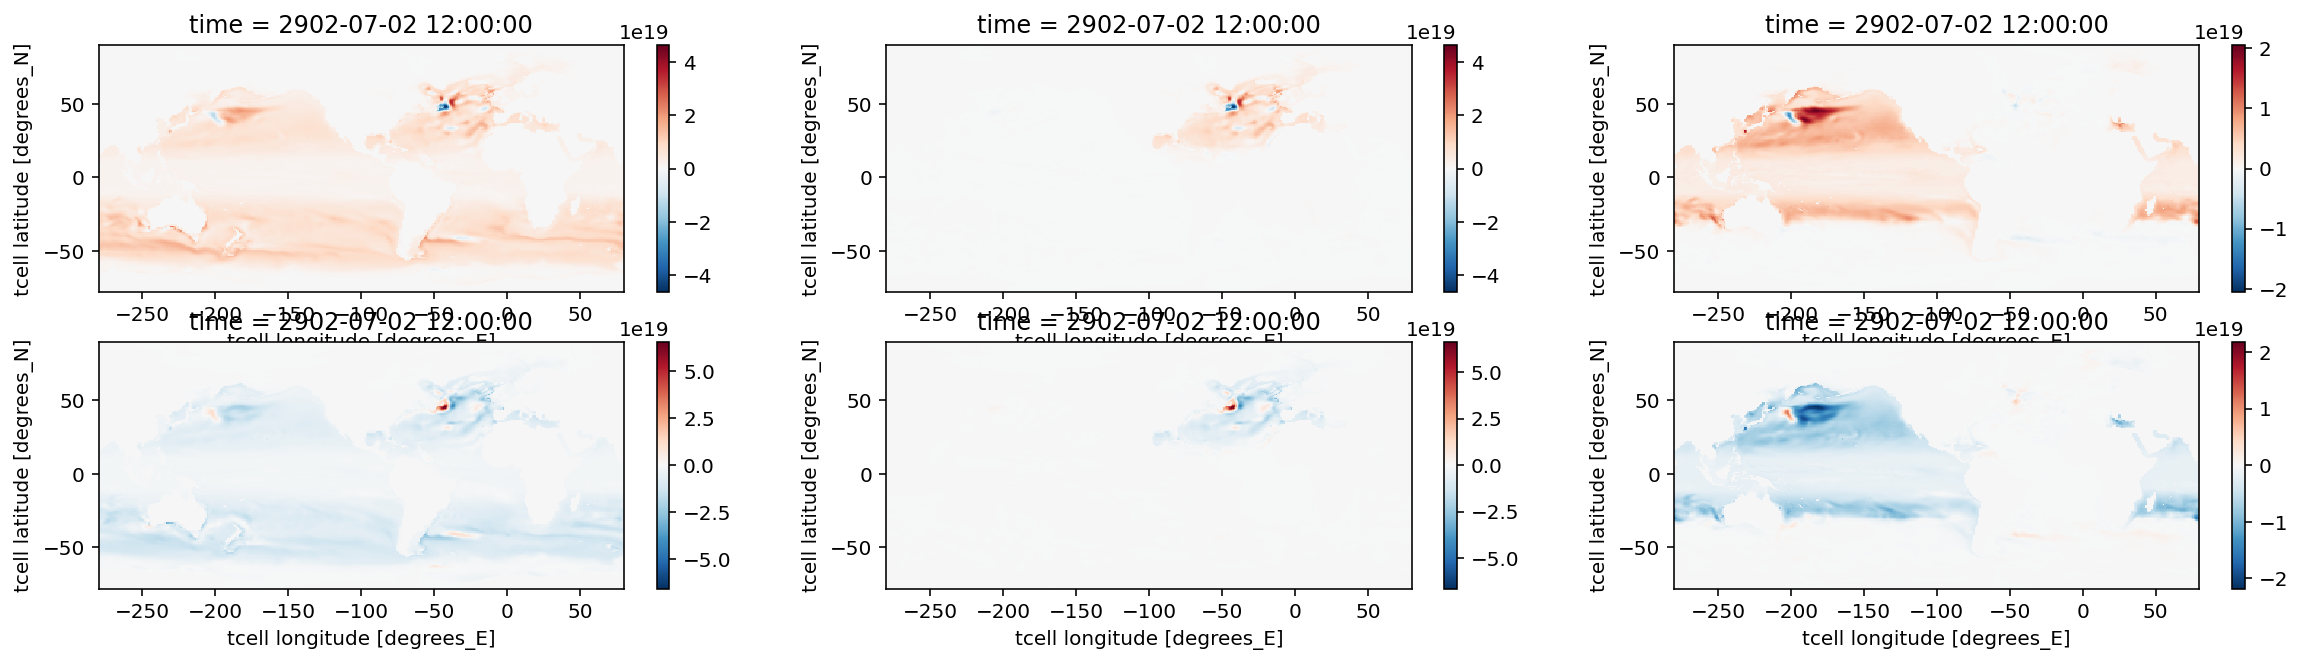

In [36]:
fig, axes = plt.subplots(figsize = (20,5), nrows = 2, ncols = 3)

time = 2
((ds_warm.temp*ds_warm.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[0,0])
((ds_cool.temp*ds_cool.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[1,0])

((ds_warmNA.temp*ds_warmNA.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[0,1])
((ds_coolNA.temp*ds_coolNA.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[1,1])

((ds_warmIP.temp*ds_warmIP.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[0,2])
((ds_coolIP.temp*ds_coolIP.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[1,2])



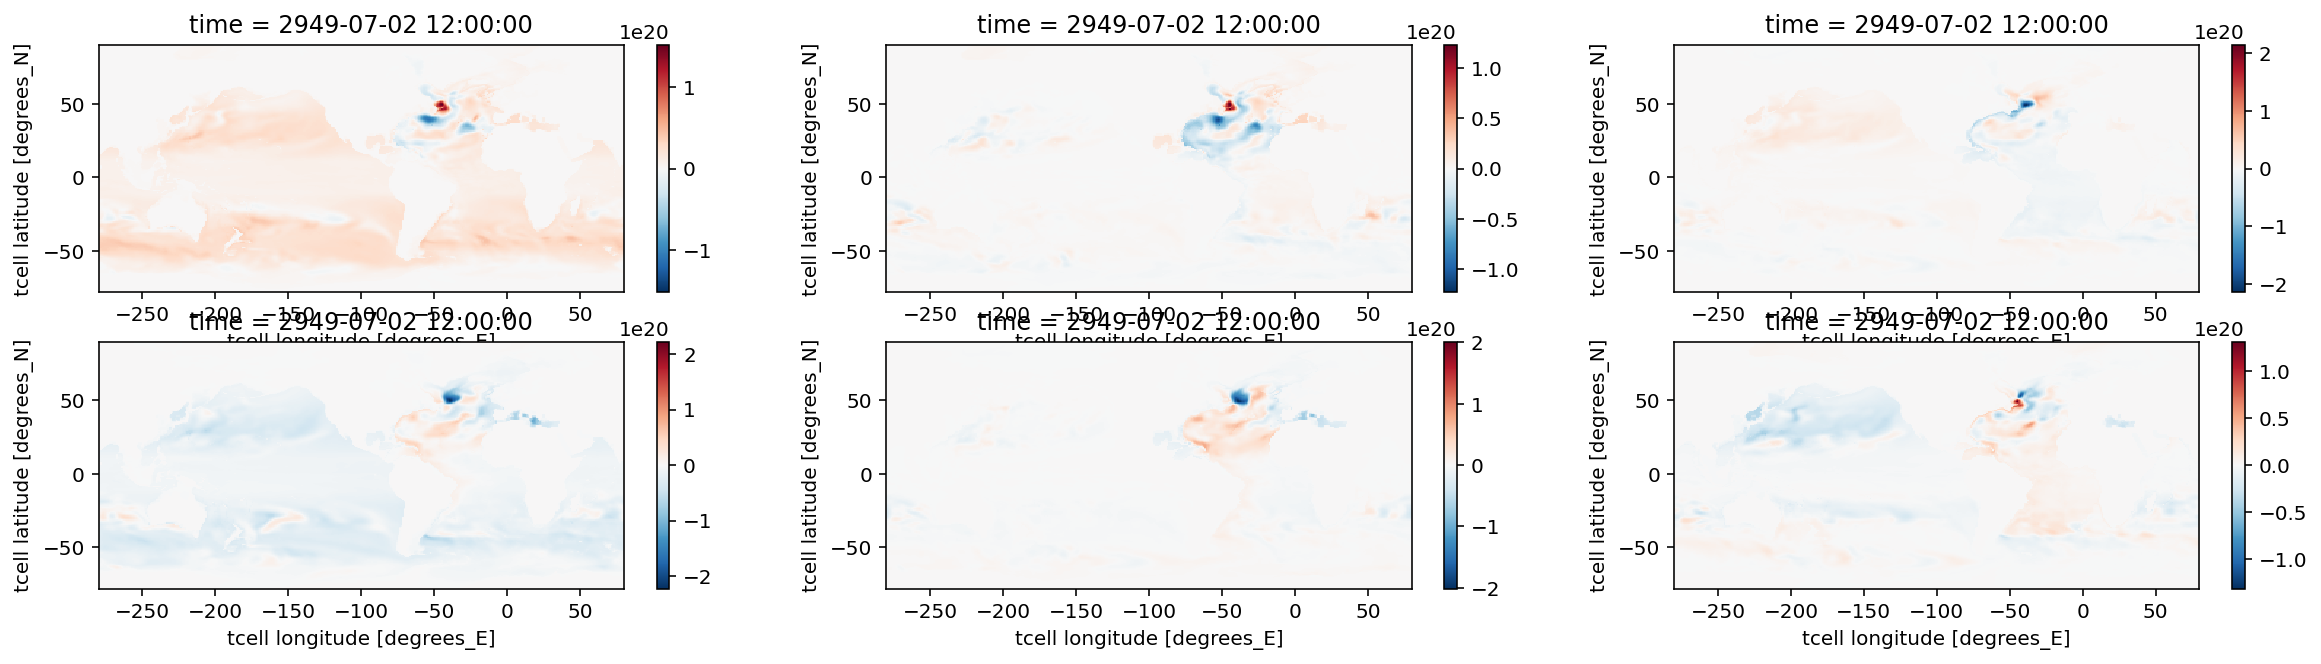

In [37]:
fig, axes = plt.subplots(figsize = (20,5), nrows = 2, ncols = 3)

time = 49
((ds_warm.temp*ds_warm.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[0,0])
((ds_cool.temp*ds_cool.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[1,0])

((ds_warmNA.temp*ds_warmNA.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[0,1])
((ds_coolNA.temp*ds_coolNA.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[1,1])

((ds_warmIP.temp*ds_warmIP.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[0,2])
((ds_coolIP.temp*ds_coolIP.dzt-ds_cont.temp*ds_cont.dzt).isel(time = time)*fgrd.area_t*rho_0*c_p).sum('st_ocean').plot(ax = axes[1,2])



# Plot MLD

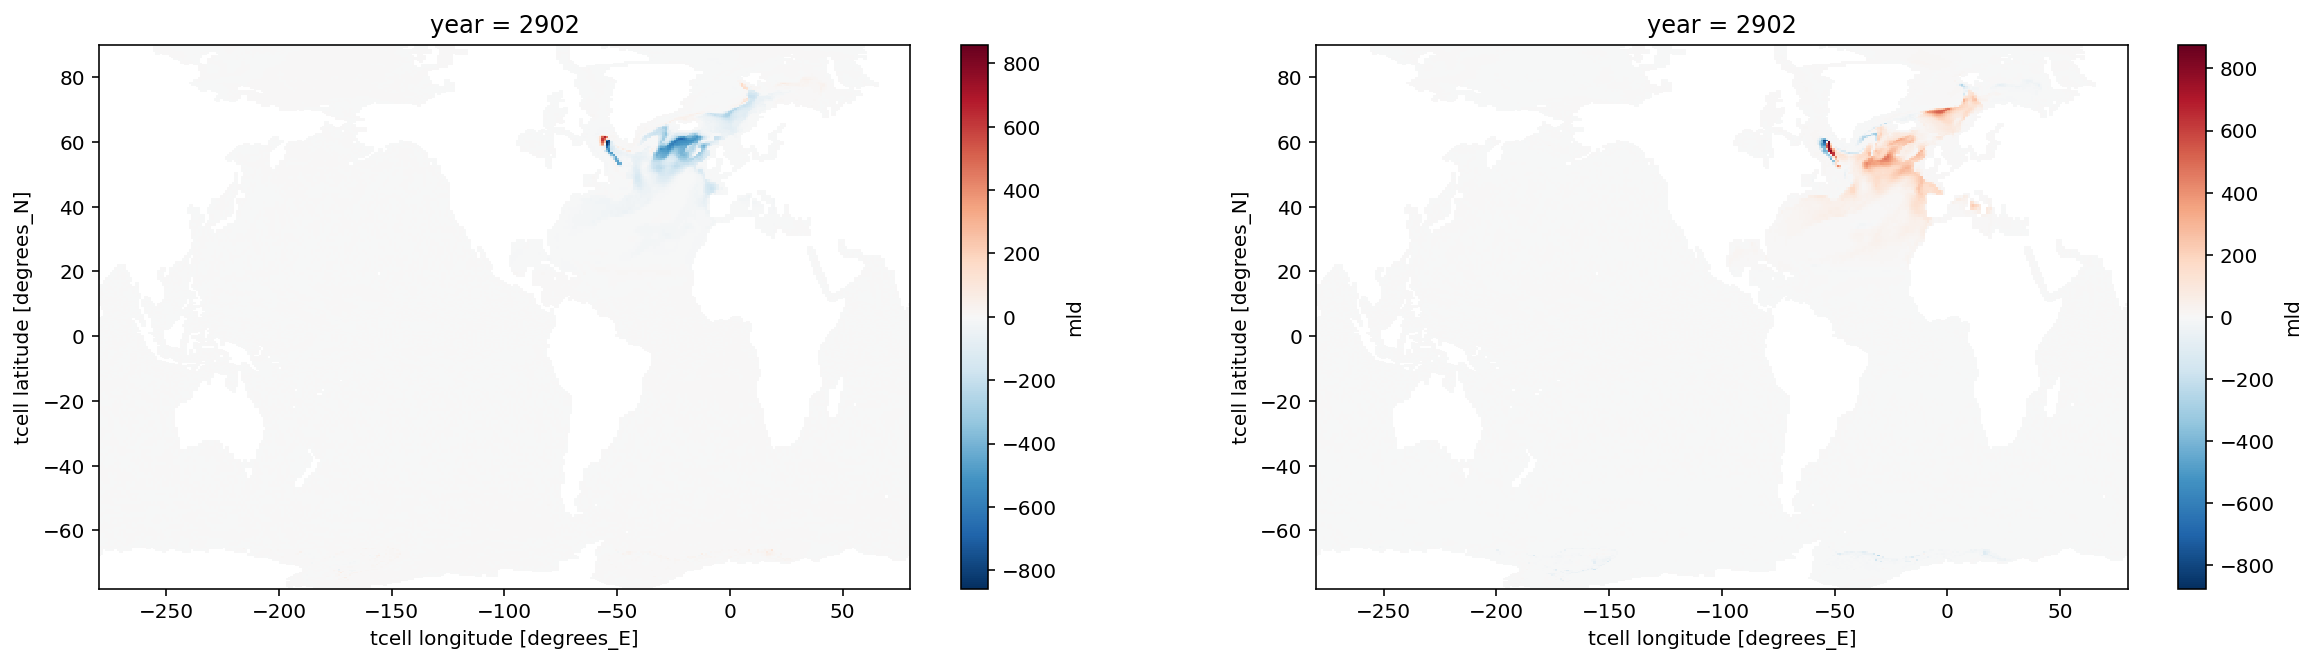

In [7]:
fig, axes = plt.subplots(figsize = (20,5),nrows = 1, ncols = 2)

(ds2_warmNA.mld-ds2_cont.mld).groupby('time.year').mean('time').isel(year = 2).plot(ax = axes[0])
(ds2_coolNA.mld-ds2_cont.mld).groupby('time.year').mean('time').isel(year = 2).plot(ax = axes[1])


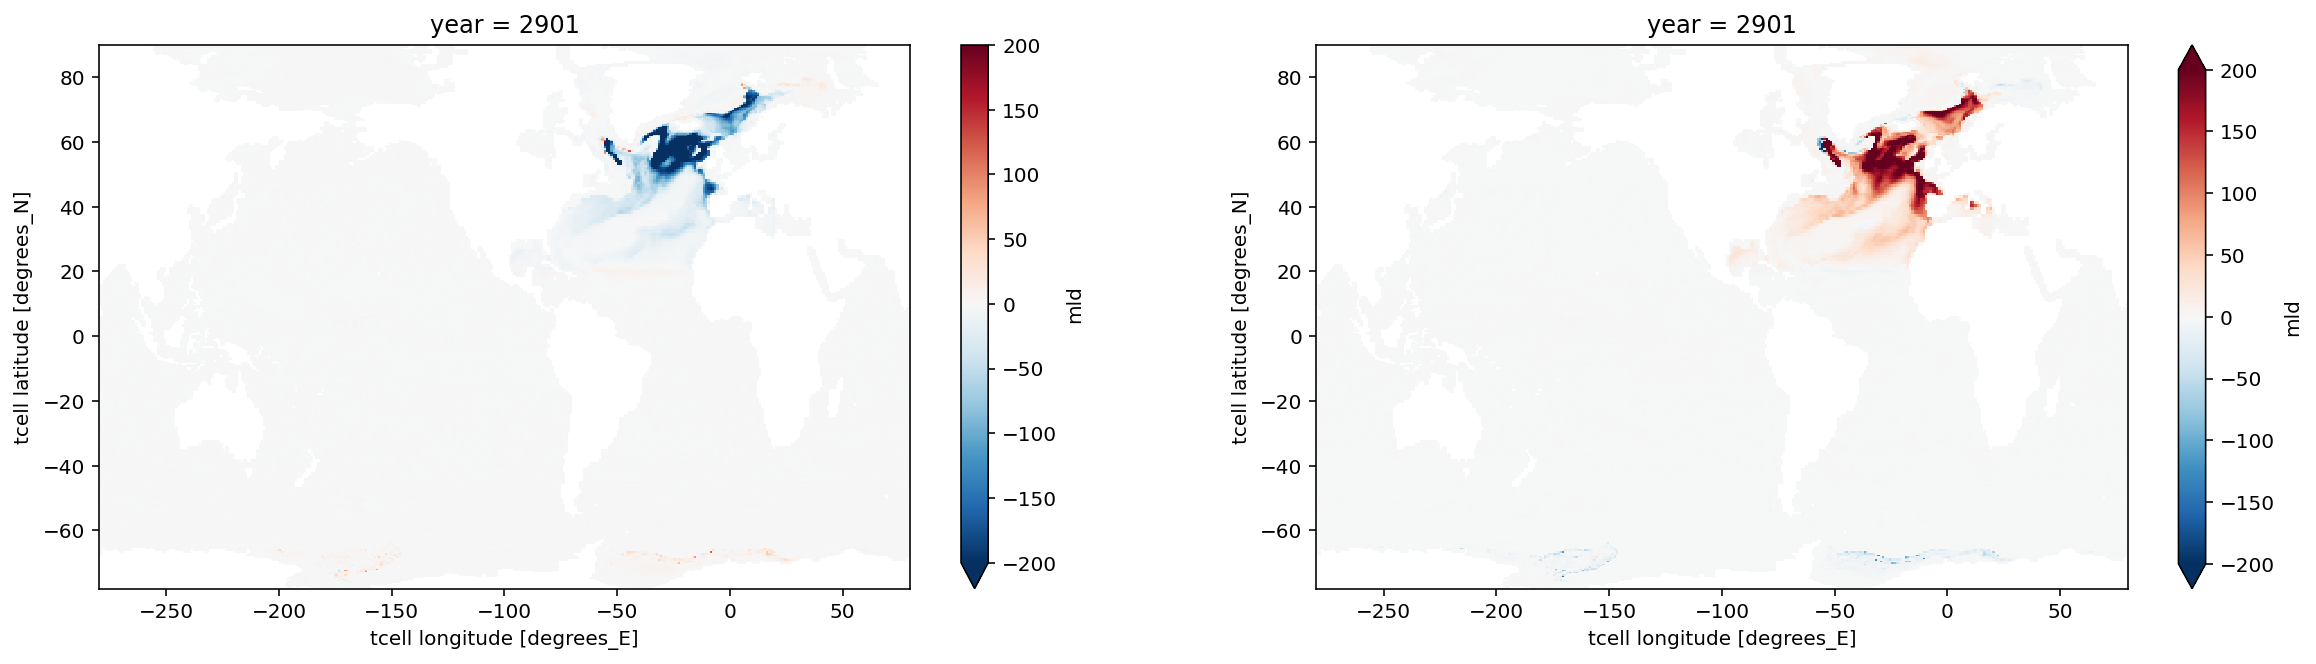

In [13]:
fig, axes = plt.subplots(figsize = (20,5),nrows = 1, ncols = 2)

(ds2_warmNA.mld-ds2_cont.mld).groupby('time.year').mean('time').isel(year = 1).plot(ax = axes[0], vmin = -200, vmax = 200, cmap = 'RdBu_r')
(ds2_coolNA.mld-ds2_cont.mld).groupby('time.year').mean('time').isel(year = 1).plot(ax = axes[1], vmin = -200, vmax = 200, cmap = 'RdBu_r')


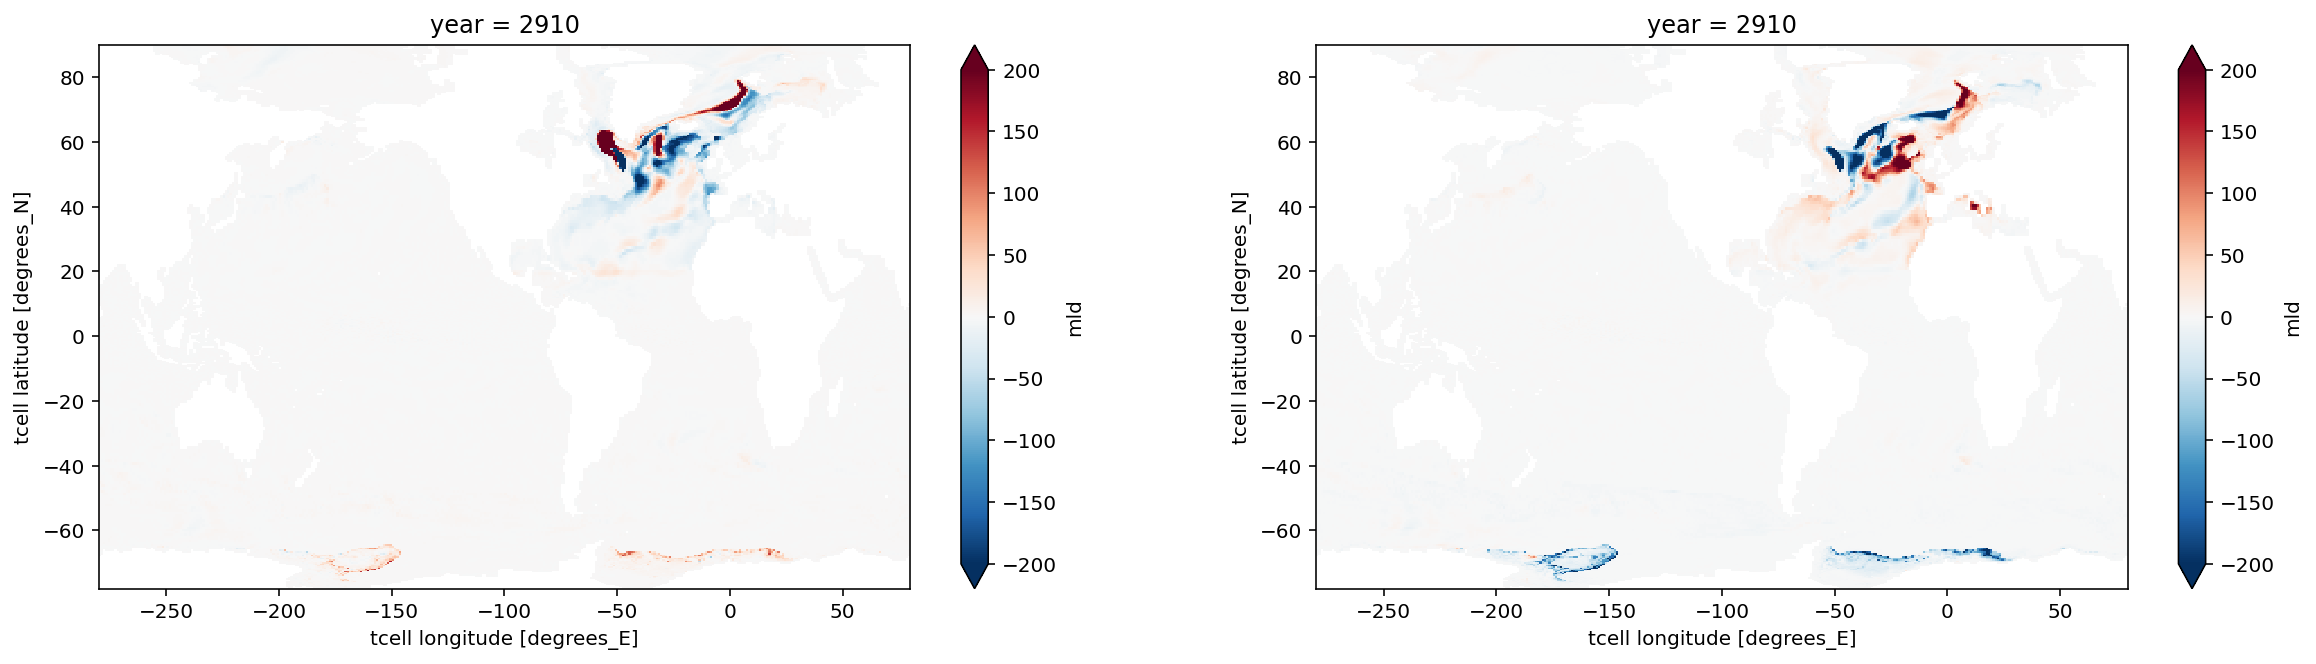

In [17]:
fig, axes = plt.subplots(figsize = (20,5),nrows = 1, ncols = 2)

(ds2_warmNA.mld-ds2_cont.mld).groupby('time.year').mean('time').isel(year = 10).plot(ax = axes[0], vmin = -200, vmax = 200, cmap = 'RdBu_r')
(ds2_coolNA.mld-ds2_cont.mld).groupby('time.year').mean('time').isel(year = 10).plot(ax = axes[1], vmin = -200, vmax = 200, cmap = 'RdBu_r')


In [12]:
rho_0 = 1030#kg/m^3
c_p = 3992 #J/kg/K

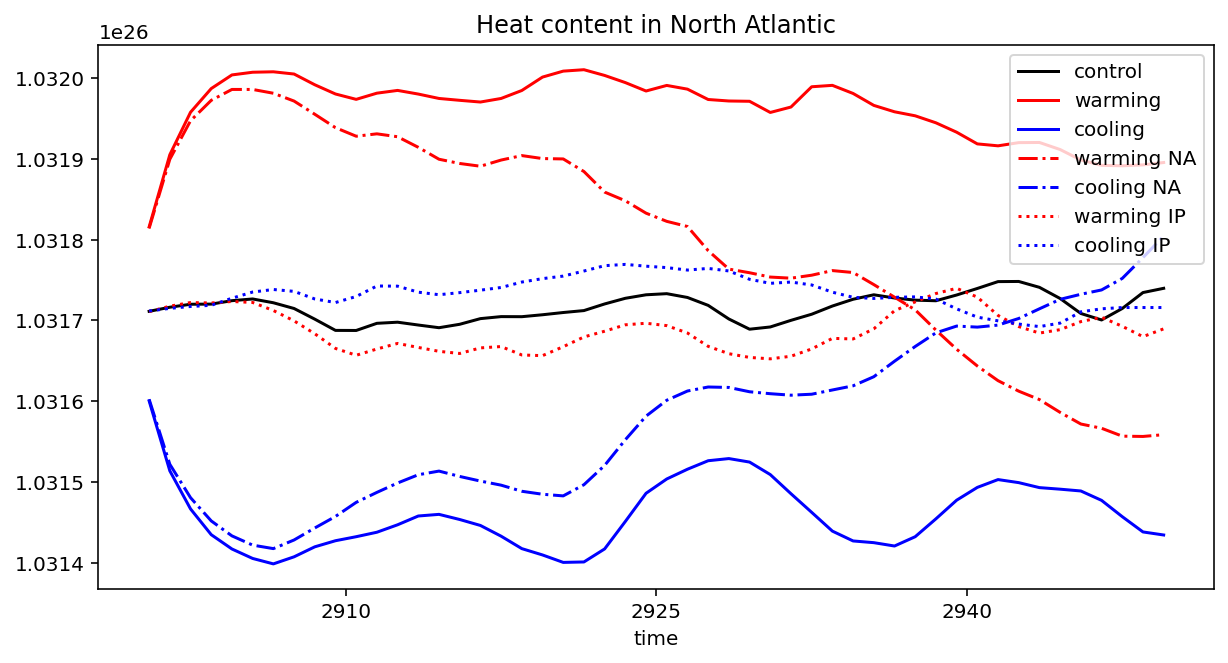

In [13]:
fig, axes = plt.subplots(figsize = (10,5))
(((ds_cont.temp*ds_cont.dzt)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'k', label = 'control')
(((ds_warm.temp*ds_warm.dzt)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'r', label = 'warming')
(((ds_cool.temp*ds_cool.dzt)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'b',label = 'cooling')
(((ds_warmNA.temp*ds_warmNA.dzt)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'r', label = 'warming NA', linestyle = '-.')
(((ds_coolNA.temp*ds_coolNA.dzt)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'b',label = 'cooling NA', linestyle = '-.')
(((ds_warmIP.temp*ds_warmIP.dzt)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'r', label = 'warming IP', linestyle = 'dotted')
(((ds_coolIP.temp*ds_coolIP.dzt)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'b',label = 'cooling IP', linestyle = 'dotted')
plt.title('Heat content in North Atlantic')
plt.legend()

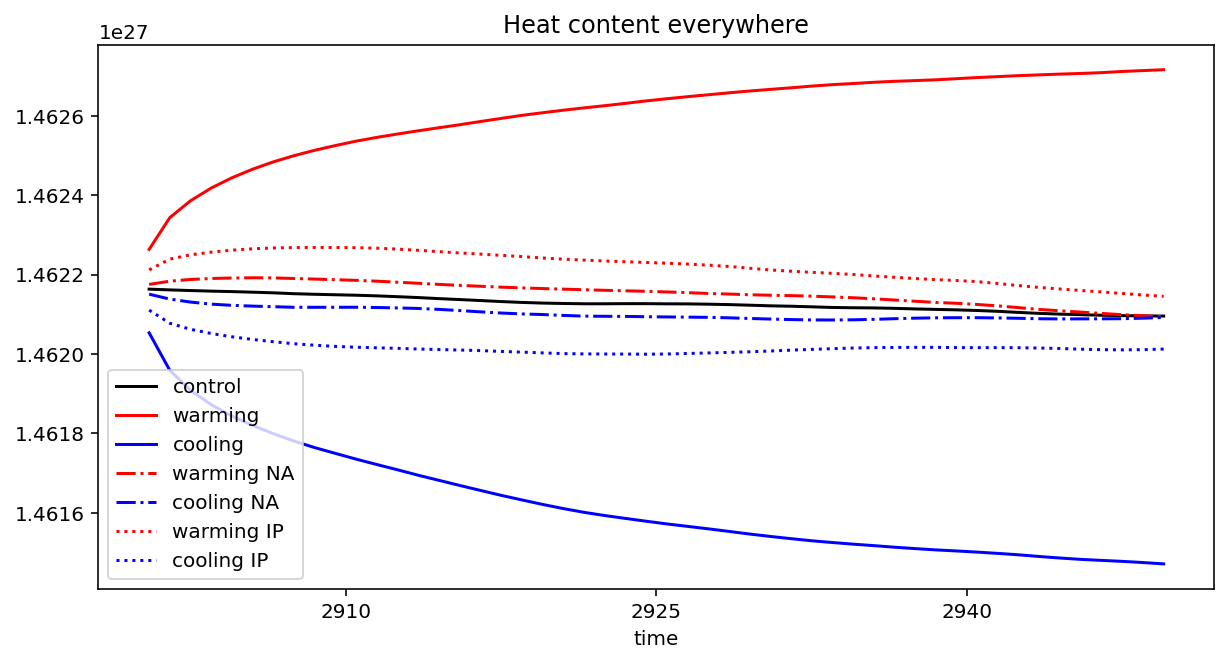

In [14]:
fig, axes = plt.subplots(figsize = (10,5))
(((ds_cont.temp*ds_cont.dzt)*fgrd.area_t*rho_0*c_p).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time',color = 'k', label = 'control')
(((ds_warm.temp*ds_warm.dzt)*fgrd.area_t*rho_0*c_p).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time',color = 'r', label = 'warming')
(((ds_cool.temp*ds_cool.dzt)*fgrd.area_t*rho_0*c_p).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time',color = 'b',label = 'cooling')
(((ds_warmNA.temp*ds_warmNA.dzt)*fgrd.area_t*rho_0*c_p).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time',color = 'r', label = 'warming NA', linestyle = '-.')
(((ds_coolNA.temp*ds_coolNA.dzt)*fgrd.area_t*rho_0*c_p).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'b',label = 'cooling NA', linestyle = '-.')
(((ds_warmIP.temp*ds_warmIP.dzt)*fgrd.area_t*rho_0*c_p).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'r', label = 'warming IP', linestyle = 'dotted')
(((ds_coolIP.temp*ds_coolIP.dzt)*fgrd.area_t*rho_0*c_p).sum('st_ocean').sum('xt_ocean').sum('yt_ocean')).plot(x = 'time', color = 'b',label = 'cooling IP', linestyle = 'dotted')
plt.title('Heat content everywhere')
plt.legend()

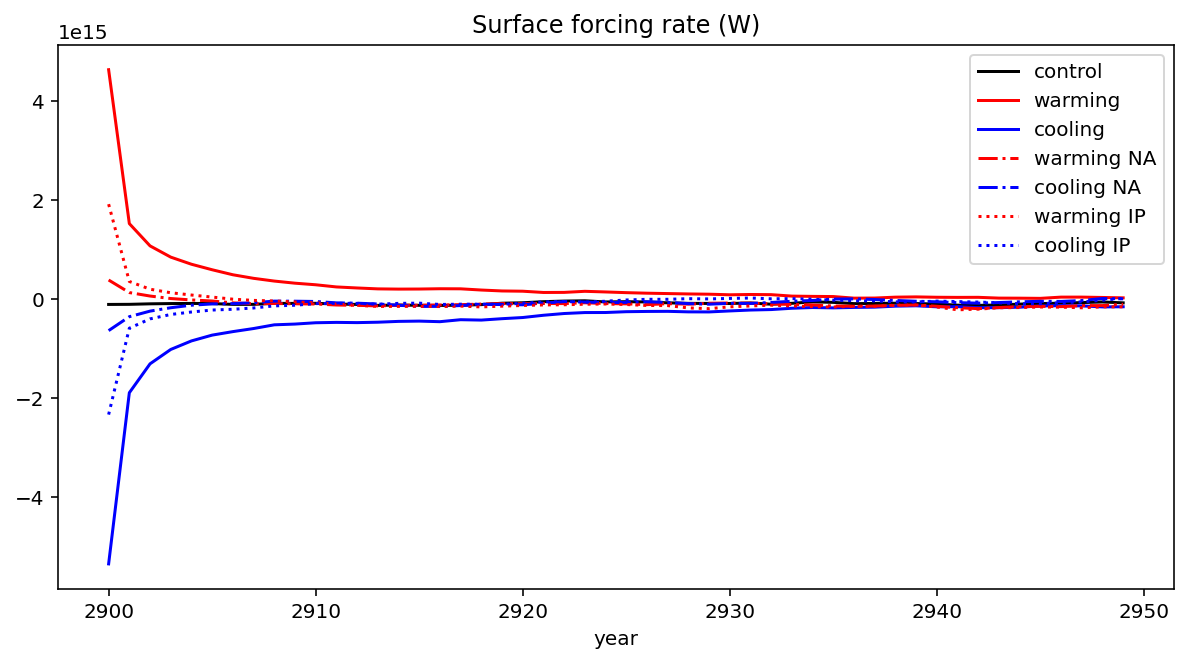

In [23]:
fig, axes = plt.subplots(figsize = (10,5))
(((ds2_cont.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year',color = 'k', label = 'control')
(((ds2_warm.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year',color = 'r', label = 'warming')
(((ds2_cool.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year',color = 'b',label = 'cooling')
(((ds2_warmNA.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year',color = 'r', label = 'warming NA', linestyle = '-.')
(((ds2_coolNA.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year', color = 'b',label = 'cooling NA', linestyle = '-.')
(((ds2_warmIP.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year', color = 'r', label = 'warming IP', linestyle = 'dotted')
(((ds2_coolIP.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year', color = 'b',label = 'cooling IP', linestyle = 'dotted')
plt.title('Surface forcing rate (W), averaged for each year')
plt.legend()

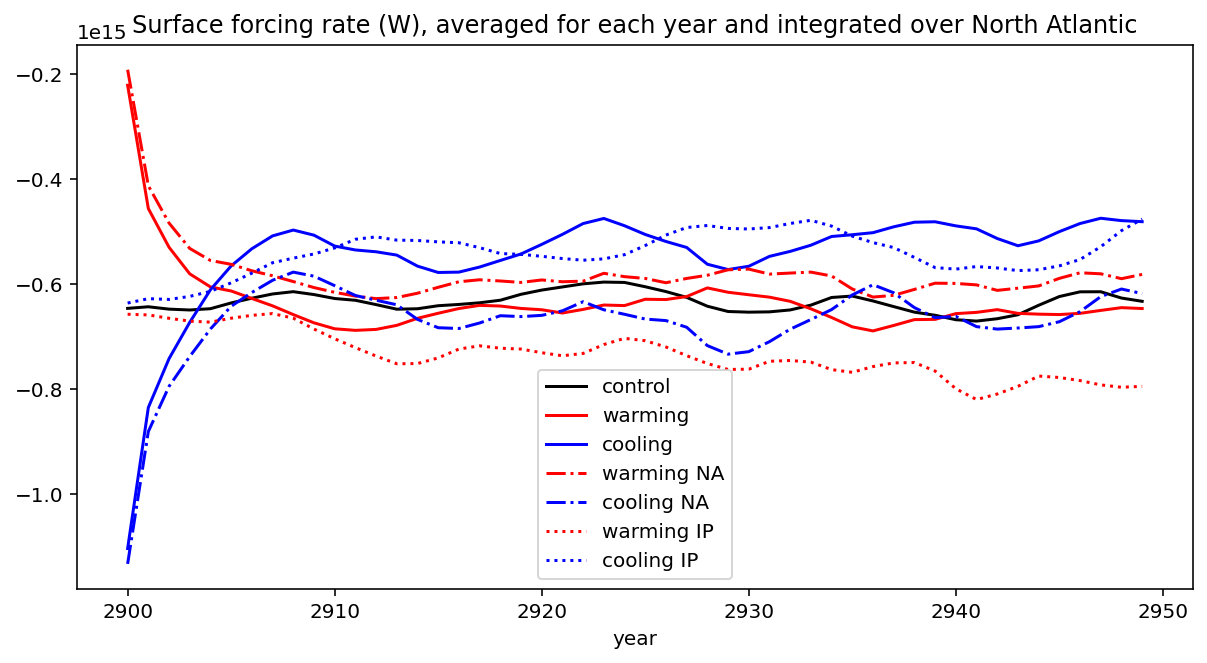

In [25]:
fig, axes = plt.subplots(figsize = (10,5))
(((ds2_cont.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year',color = 'k', label = 'control')
(((ds2_warm.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year',color = 'r', label = 'warming')
(((ds2_cool.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year',color = 'b',label = 'cooling')
(((ds2_warmNA.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year',color = 'r', label = 'warming NA', linestyle = '-.')
(((ds2_coolNA.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year', color = 'b',label = 'cooling NA', linestyle = '-.')
(((ds2_warmIP.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year', color = 'r', label = 'warming IP', linestyle = 'dotted')
(((ds2_coolIP.net_sfc_heating*ds2_cont.time.dt.days_in_month)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean').groupby('time.year').sum('time')/365).plot(x = 'year', color = 'b',label = 'cooling IP', linestyle = 'dotted')
plt.title('Surface forcing rate (W), averaged for each year and integrated over North Atlantic')
plt.legend()

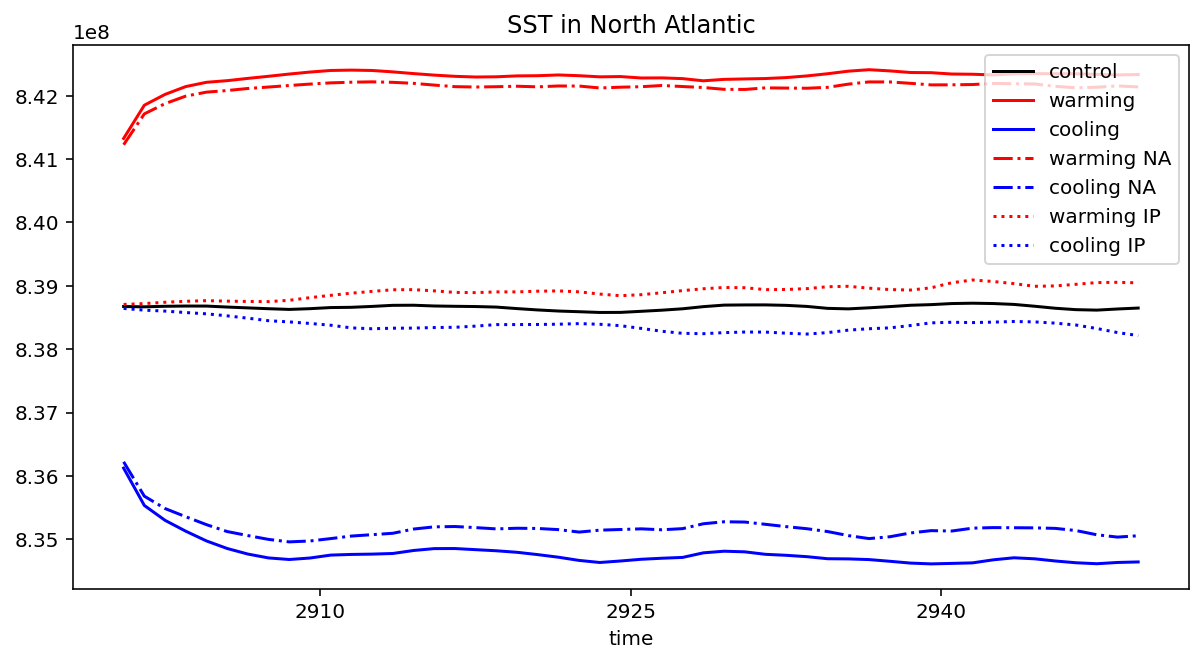

In [29]:
fig, axes = plt.subplots(figsize = (10,5))
area = fgrd.area_t.sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')
(((ds_cont.temp)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).isel(st_ocean = 0).sum('xt_ocean').sum('yt_ocean')/area).plot(x = 'time', color = 'k', label = 'control')
(((ds_warm.temp)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).isel(st_ocean = 0).sum('xt_ocean').sum('yt_ocean')/area).plot(x = 'time', color = 'r', label = 'warming')
(((ds_cool.temp)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).isel(st_ocean = 0).sum('xt_ocean').sum('yt_ocean')/area).plot(x = 'time', color = 'b',label = 'cooling')
(((ds_warmNA.temp)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).isel(st_ocean = 0).sum('xt_ocean').sum('yt_ocean')/area).plot(x = 'time', color = 'r', label = 'warming NA', linestyle = '-.')
(((ds_coolNA.temp)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).isel(st_ocean = 0).sum('xt_ocean').sum('yt_ocean')/area).plot(x = 'time', color = 'b',label = 'cooling NA', linestyle = '-.')
(((ds_warmIP.temp)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).isel(st_ocean = 0).sum('xt_ocean').sum('yt_ocean')/area).plot(x = 'time', color = 'r', label = 'warming IP', linestyle = 'dotted')
(((ds_coolIP.temp)*fgrd.area_t*rho_0*c_p).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).isel(st_ocean = 0).sum('xt_ocean').sum('yt_ocean')/area).plot(x = 'time', color = 'b',label = 'cooling IP', linestyle = 'dotted')
plt.title('SST in North Atlantic')
plt.legend()

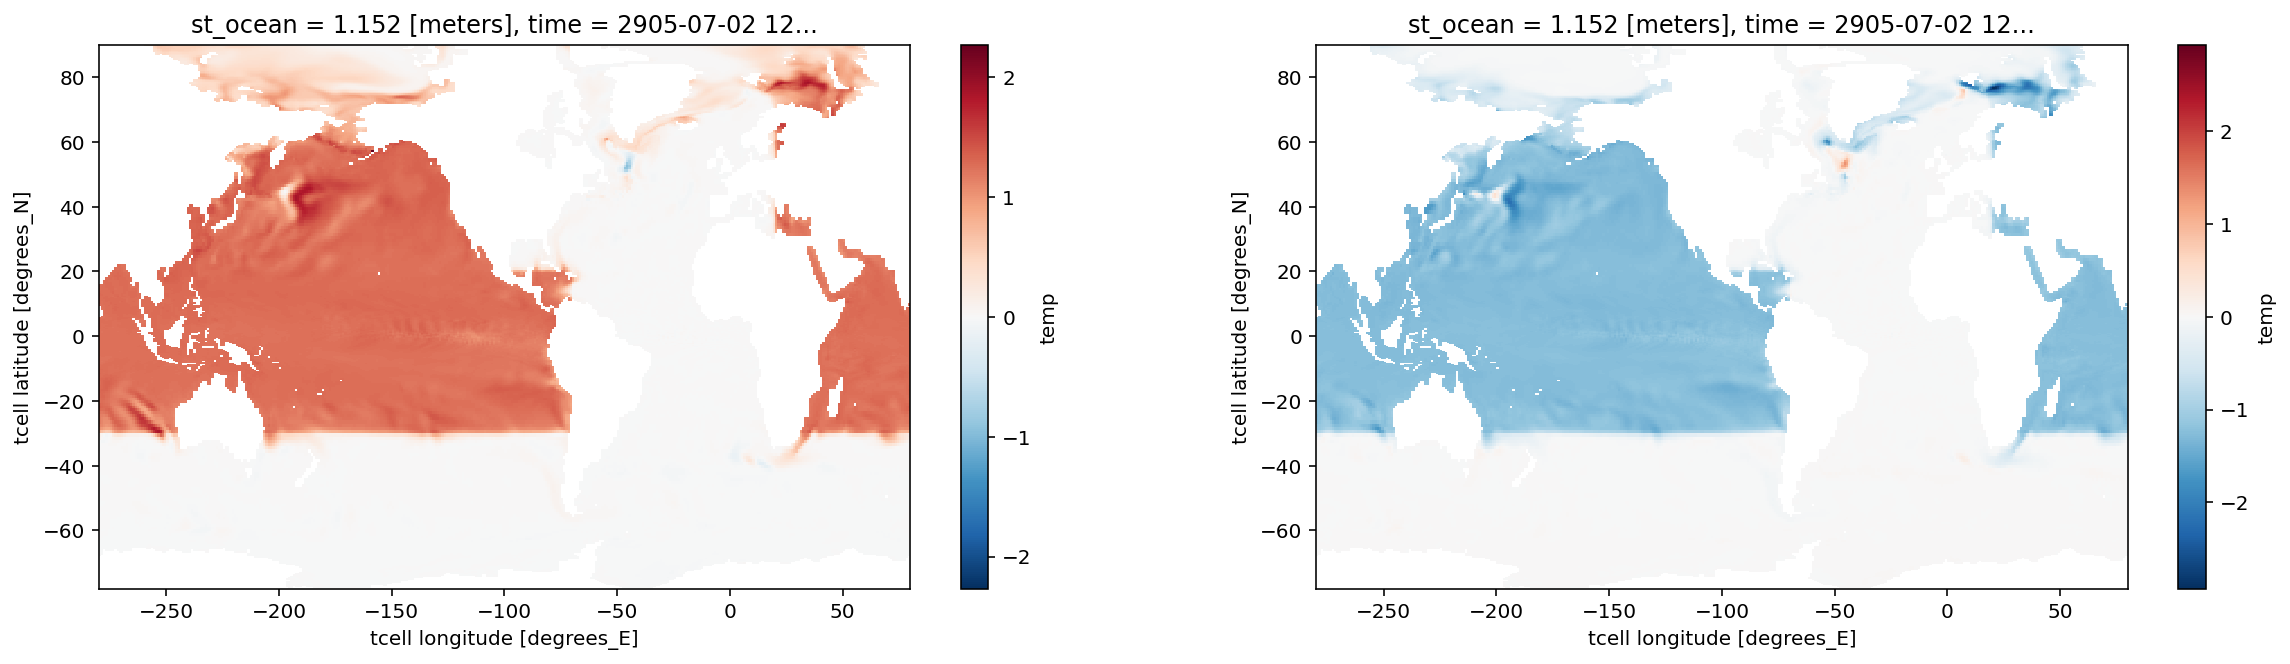

In [32]:
fig, axes = plt.subplots(figsize = (20,5),nrows = 1, ncols = 2)

(ds_warmIP.temp-ds_cont.temp).isel(time = 5).isel(st_ocean = 0).plot(ax = axes[0])
(ds_coolIP.temp-ds_cont.temp).isel(time = 5).isel(st_ocean = 0).plot(ax = axes[1])


# Plot temperature depth profile in Atlantic

Text(0.5, 0.98, 'Temperature')

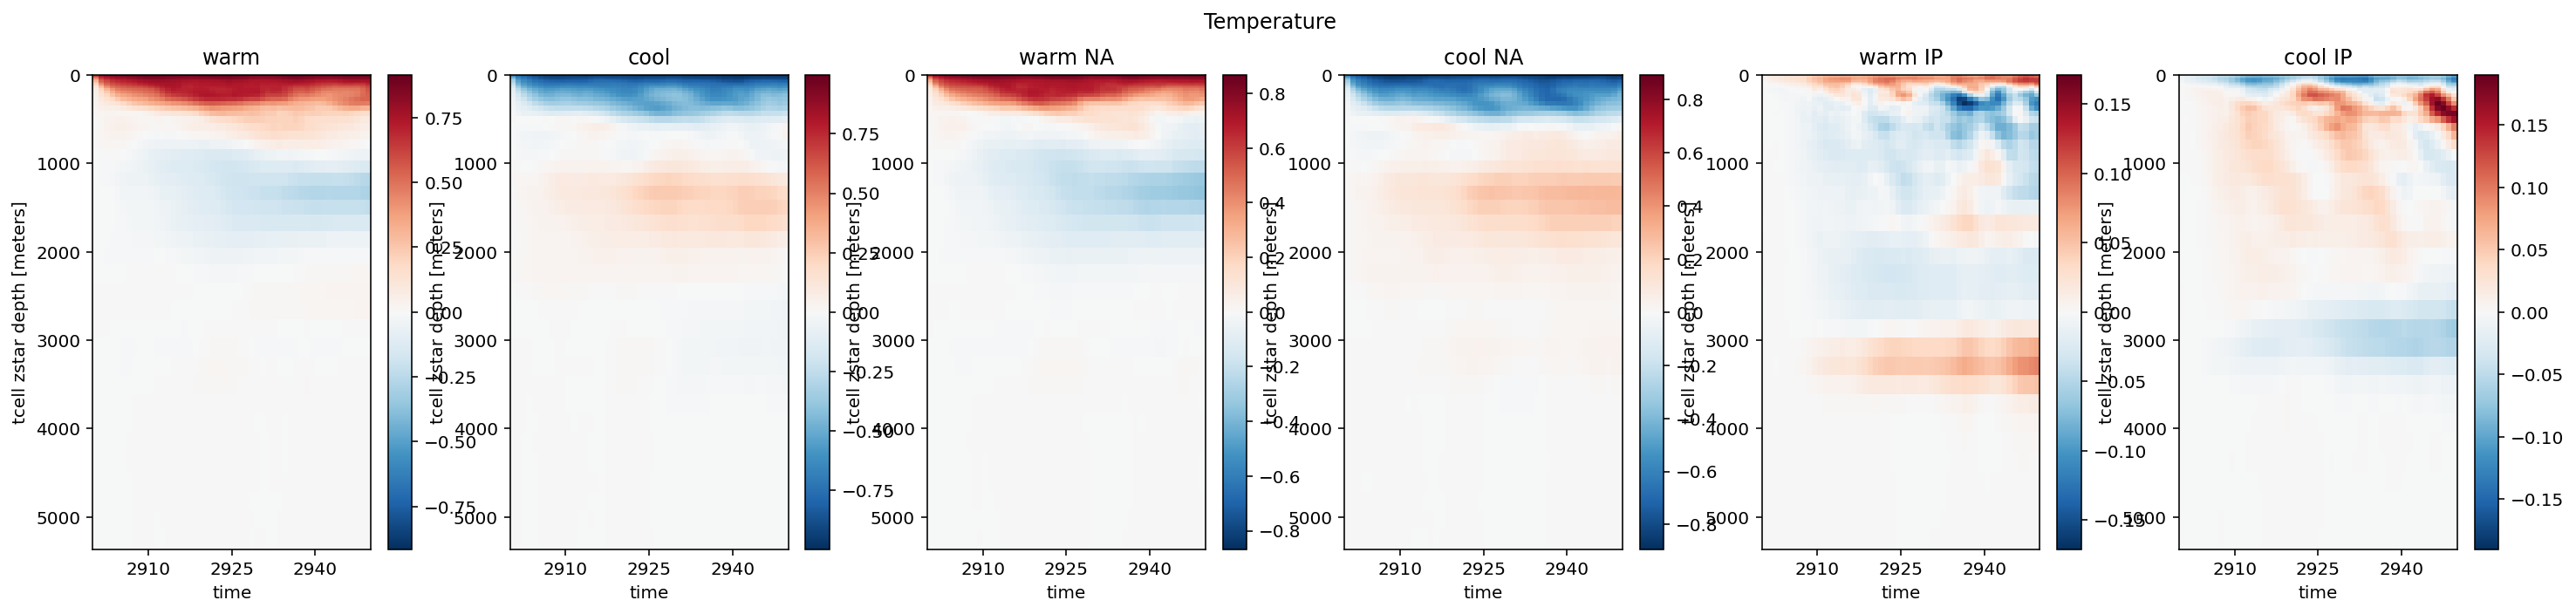

In [8]:
fig, axes = plt.subplots(figsize = (25,5),nrows = 1, ncols = 6)

area = fgrd.area_t.sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')
(((ds_warm.temp-ds_cont.temp)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[0], x = 'time',yincrease = False)
(((ds_cool.temp-ds_cont.temp)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[1], x = 'time',yincrease = False)
(((ds_warmNA.temp-ds_cont.temp)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[2], x = 'time',yincrease = False)
(((ds_coolNA.temp-ds_cont.temp)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[3], x = 'time',yincrease = False)
(((ds_warmIP.temp-ds_cont.temp)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[4], x = 'time',yincrease = False)
(((ds_coolIP.temp-ds_cont.temp)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[5], x = 'time',yincrease = False)

axes[0].set_title('warm')
axes[1].set_title('cool')
axes[2].set_title('warm NA')
axes[3].set_title('cool NA')
axes[4].set_title('warm IP')
axes[5].set_title('cool IP')
plt.suptitle('Temperature')


Text(0.5, 0.98, 'Salinity')

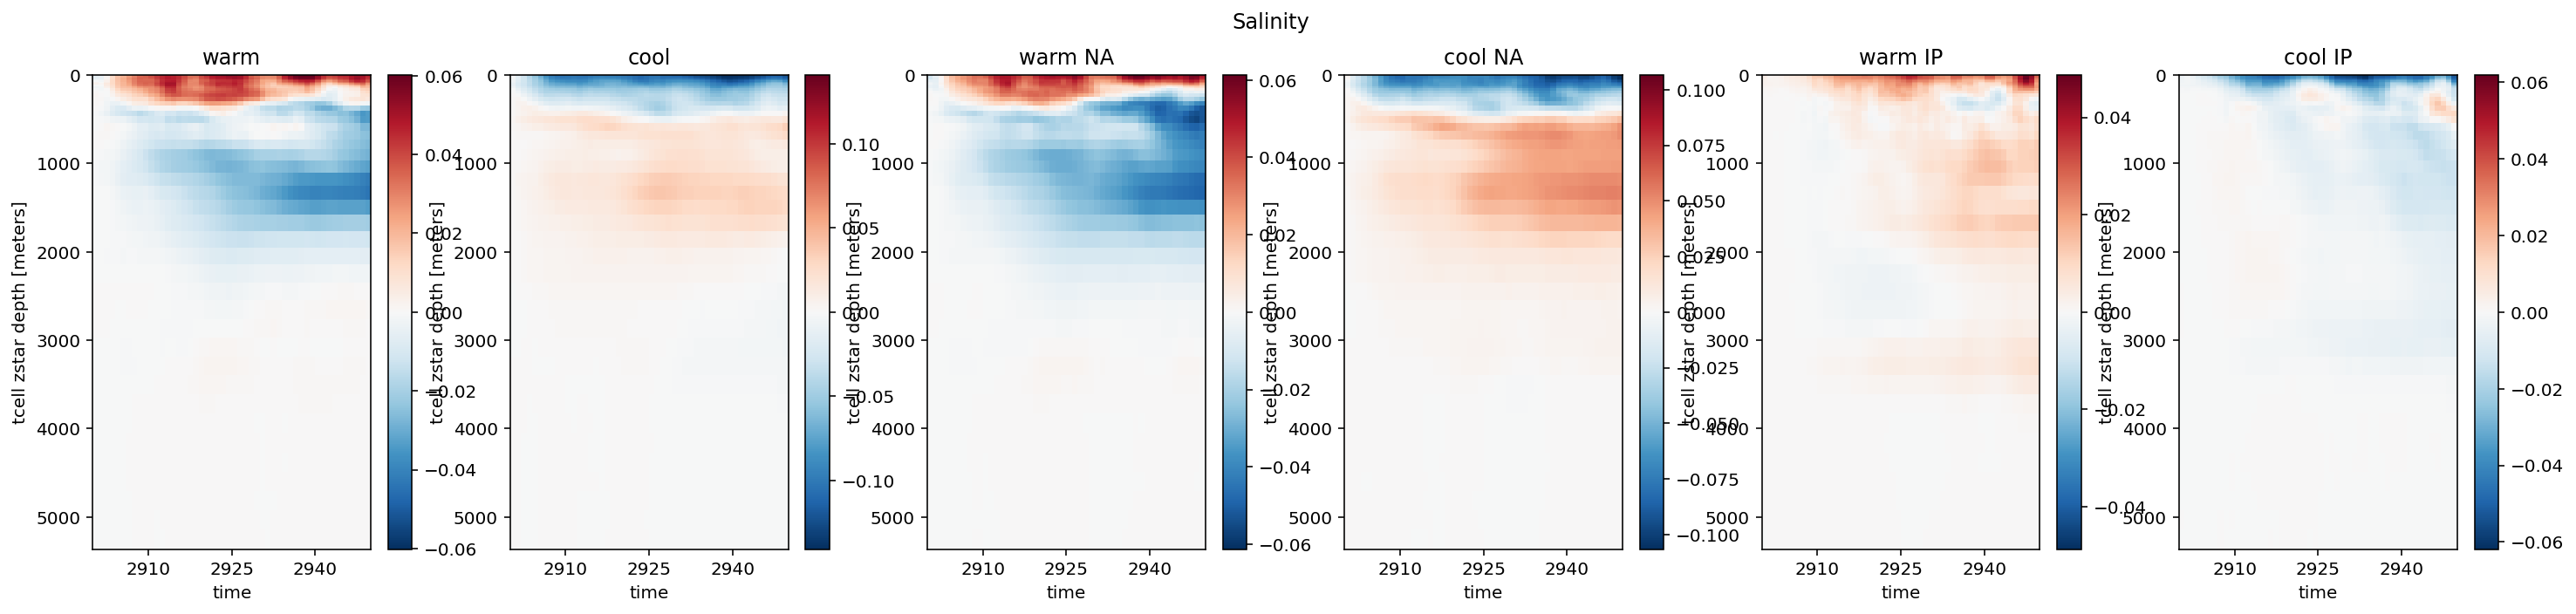

In [9]:
fig, axes = plt.subplots(figsize = (25,5),nrows = 1, ncols = 6)

area = fgrd.area_t.sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')
(((ds_warm.salt-ds_cont.salt)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[0], x = 'time',yincrease = False)
(((ds_cool.salt-ds_cont.salt)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[1], x = 'time',yincrease = False)
(((ds_warmNA.salt-ds_cont.salt)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[2], x = 'time',yincrease = False)
(((ds_coolNA.salt-ds_cont.salt)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[3], x = 'time',yincrease = False)
(((ds_warmIP.salt-ds_cont.salt)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[4], x = 'time',yincrease = False)
(((ds_coolIP.salt-ds_cont.salt)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[5], x = 'time',yincrease = False)

axes[0].set_title('warm')
axes[1].set_title('cool')
axes[2].set_title('warm NA')
axes[3].set_title('cool NA')
axes[4].set_title('warm IP')
axes[5].set_title('cool IP')
plt.suptitle('Salinity')


Text(0.5, 0.98, 'Salinity')

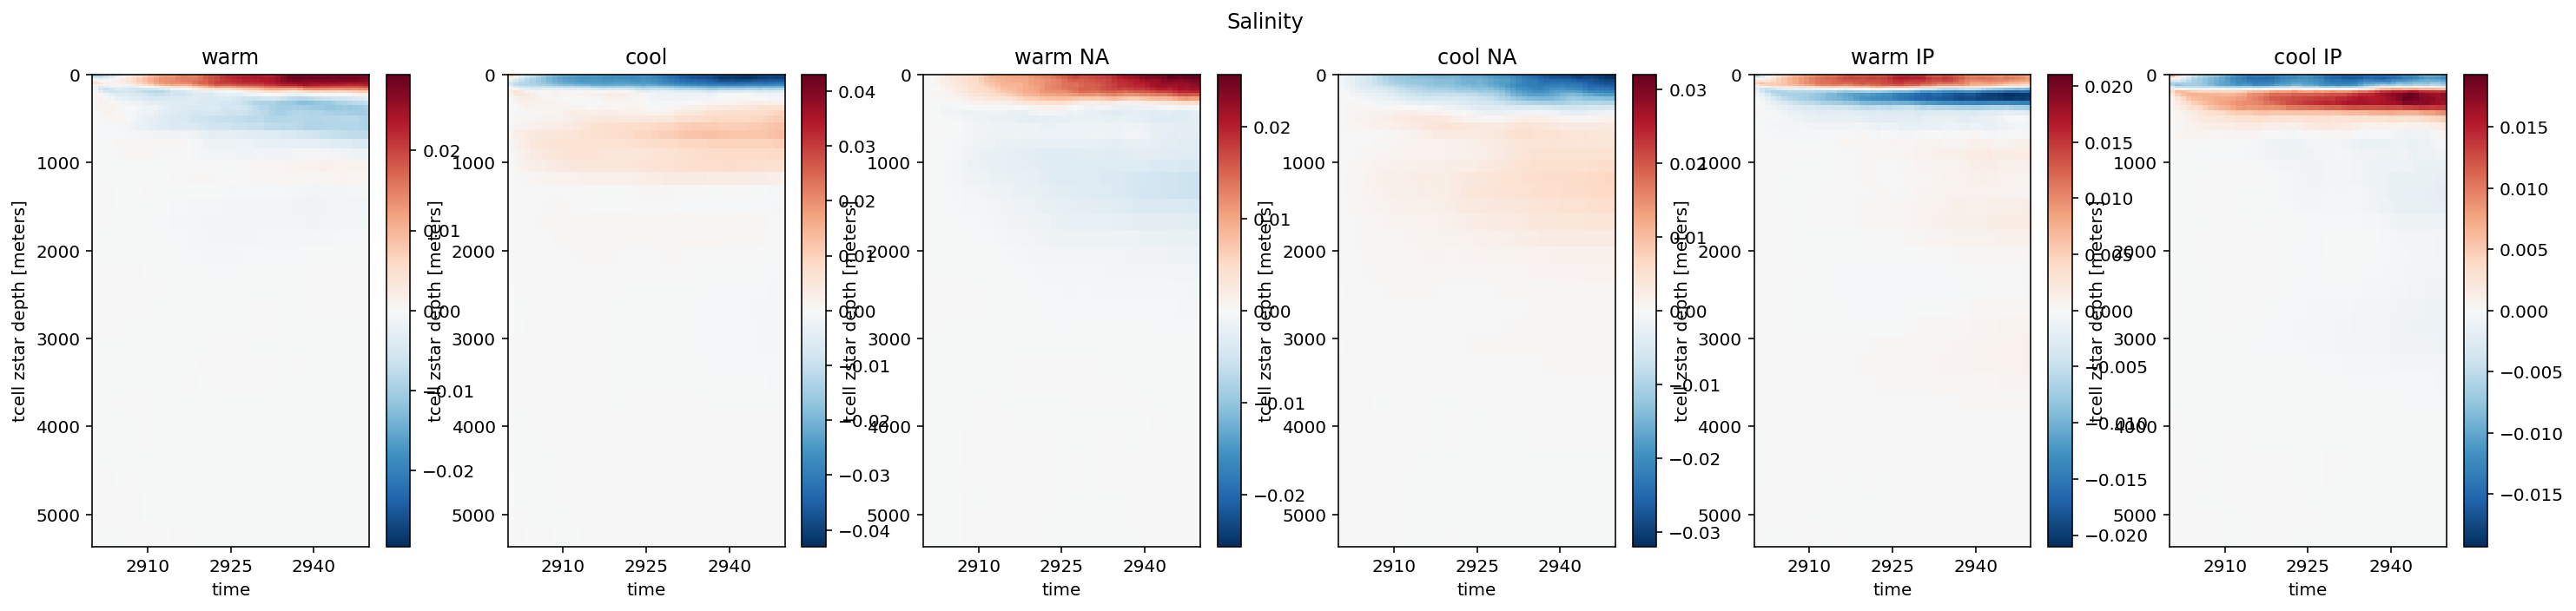

In [13]:
fig, axes = plt.subplots(figsize = (25,5),nrows = 1, ncols = 6)

area = fgrd.area_t.sum('xt_ocean').sum('yt_ocean')
(((ds_warm.salt-ds_cont.salt)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[0], x = 'time',yincrease = False)
(((ds_cool.salt-ds_cont.salt)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[1], x = 'time',yincrease = False)
(((ds_warmNA.salt-ds_cont.salt)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[2], x = 'time',yincrease = False)
(((ds_coolNA.salt-ds_cont.salt)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[3], x = 'time',yincrease = False)
(((ds_warmIP.salt-ds_cont.salt)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[4], x = 'time',yincrease = False)
(((ds_coolIP.salt-ds_cont.salt)*fgrd.area_t).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[5], x = 'time',yincrease = False)

axes[0].set_title('warm')
axes[1].set_title('cool')
axes[2].set_title('warm NA')
axes[3].set_title('cool NA')
axes[4].set_title('warm IP')
axes[5].set_title('cool IP')
plt.suptitle('Salinity')


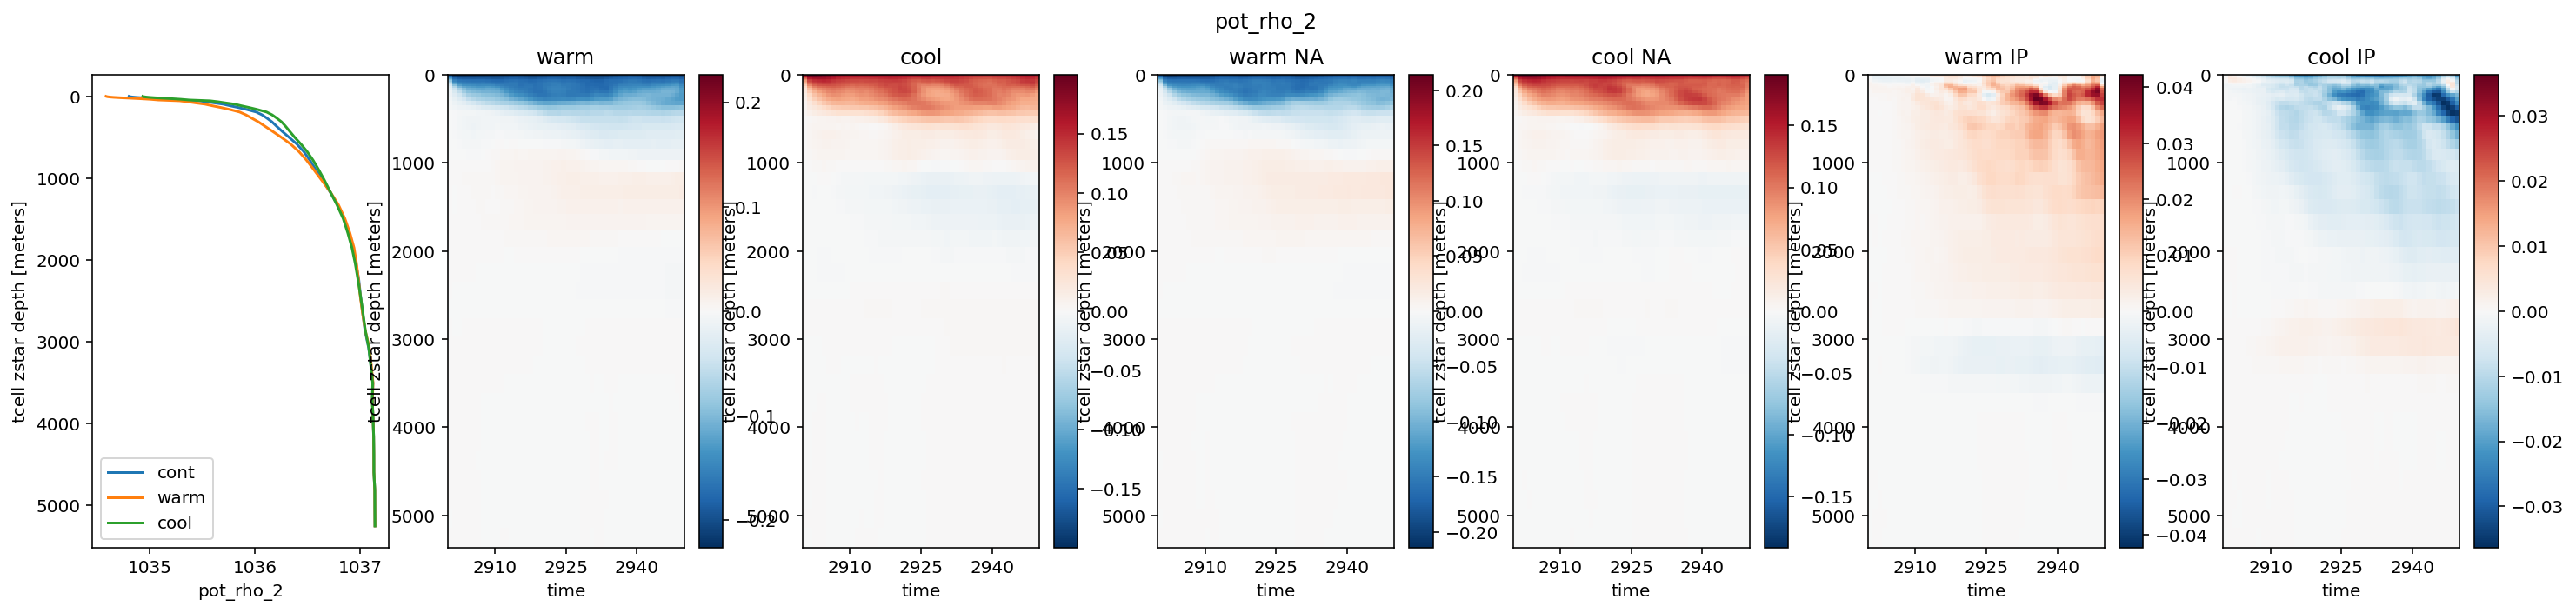

In [34]:
fig, axes = plt.subplots(figsize = (25,5),nrows = 1, ncols = 7)

area = fgrd.area_t.sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')

((ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).mean('xt_ocean').mean('yt_ocean')).mean('time').plot(ax = axes[0], y = 'st_ocean', yincrease = False, label = 'cont')
((ds_warm.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).mean('xt_ocean').mean('yt_ocean')).mean('time').plot(ax = axes[0], y = 'st_ocean', yincrease = False, label = 'warm')
((ds_cool.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).mean('xt_ocean').mean('yt_ocean')).mean('time').plot(ax = axes[0], y = 'st_ocean', yincrease = False, label = 'cool')
(((ds_warm.pot_rho_2-ds_cont.pot_rho_2)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[1], x = 'time',yincrease = False)
(((ds_cool.pot_rho_2-ds_cont.pot_rho_2)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[2], x = 'time',yincrease = False)
(((ds_warmNA.pot_rho_2-ds_cont.pot_rho_2)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[3], x = 'time',yincrease = False)
(((ds_coolNA.pot_rho_2-ds_cont.pot_rho_2)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[4], x = 'time',yincrease = False)
(((ds_warmIP.pot_rho_2-ds_cont.pot_rho_2)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[5], x = 'time',yincrease = False)
(((ds_coolIP.pot_rho_2-ds_cont.pot_rho_2)*fgrd.area_t).sel(xt_ocean = slice(-100,0),yt_ocean = slice(20,70)).sum('xt_ocean').sum('yt_ocean')/area).plot(ax = axes[6], x = 'time',yincrease = False)

axes[1].set_title('warm')
axes[2].set_title('cool')
axes[3].set_title('warm NA')
axes[4].set_title('cool NA')
axes[5].set_title('warm IP')
axes[6].set_title('cool IP')
plt.suptitle('pot_rho_2')
axes[0].legend()


Cooling perturbation -> positive latent heat flux anomaly (less evaporation)
-> salinity decreases at surface since less water leaving
-> fresher means less dense
-> stronger buoyancy gradient
-> stronger AMOC

but we see weaker AMOC

hang on, gradient of density looks stronger in warming run and weaker in cooling, due to large sudden temperature change at top.... does AMOC feed off density gradient??

Text(0.5, 0.98, 'pot_rho_2 slice')

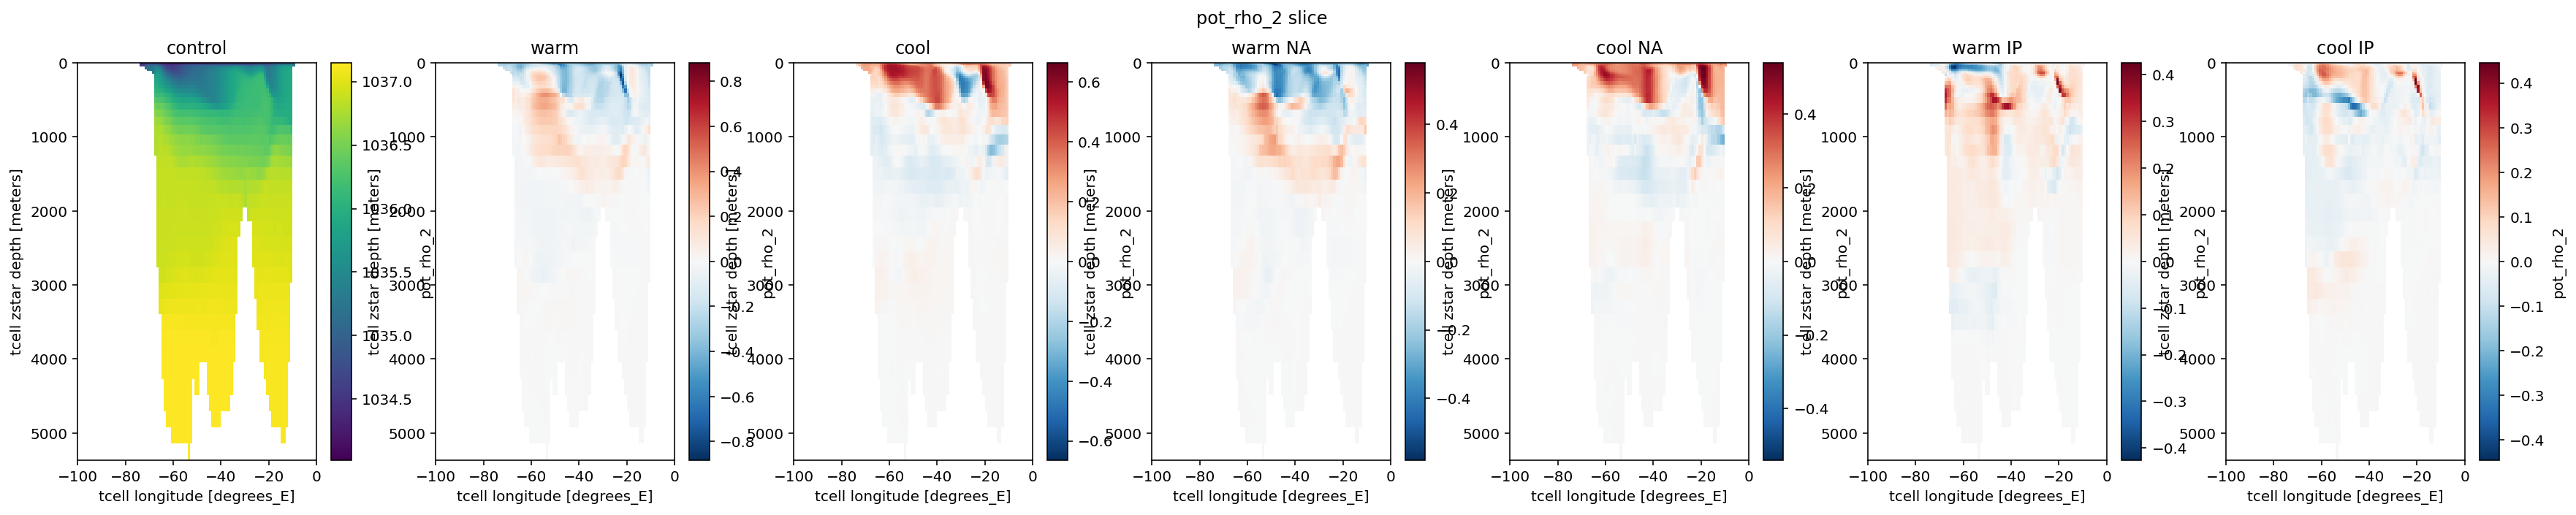

In [27]:
fig, axes = plt.subplots(figsize = (30,5),nrows = 1, ncols = 7)

time = 49

((ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[0], y = 'st_ocean', yincrease = False)
((ds_warm.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[1], y = 'st_ocean', yincrease = False)
((ds_cool.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[2], y = 'st_ocean', yincrease = False)
((ds_warmNA.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[3], y = 'st_ocean', yincrease = False)
((ds_coolNA.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[4], y = 'st_ocean', yincrease = False)
((ds_warmIP.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[5], y = 'st_ocean', yincrease = False)
((ds_coolIP.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[6], y = 'st_ocean', yincrease = False)

axes[0].set_title('control')

axes[1].set_title('warm')
axes[2].set_title('cool')
axes[3].set_title('warm NA')
axes[4].set_title('cool NA')
axes[5].set_title('warm IP')
axes[6].set_title('cool IP')
plt.suptitle('pot_rho_2 slice')


Text(0.5, 0.98, 'pot_rho_2 slice')

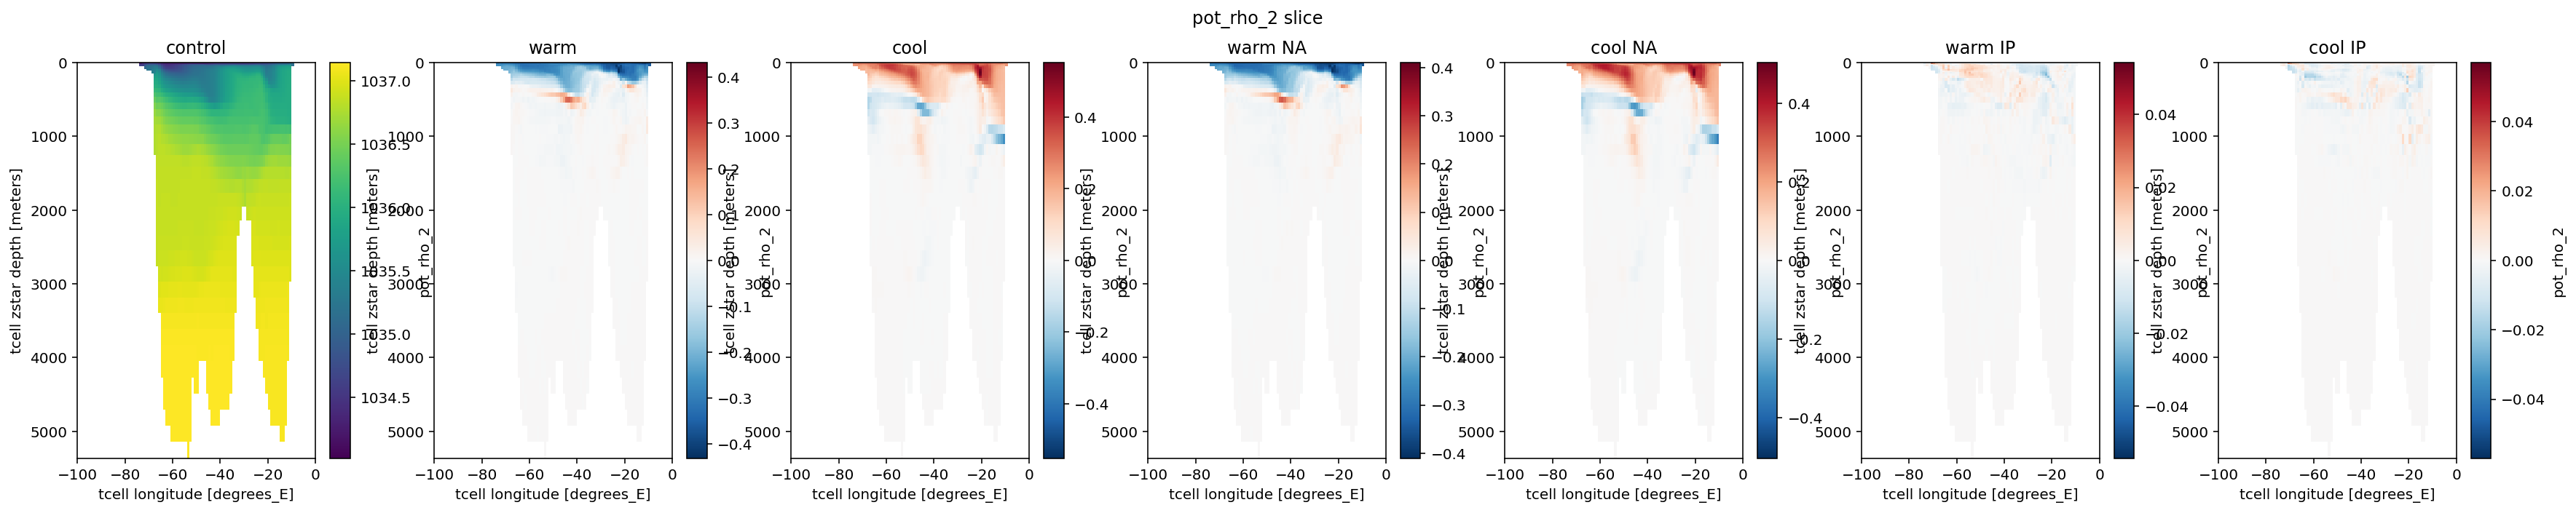

In [28]:
fig, axes = plt.subplots(figsize = (30,5),nrows = 1, ncols = 7)

time = 3

((ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[0], y = 'st_ocean', yincrease = False)
((ds_warm.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[1], y = 'st_ocean', yincrease = False)
((ds_cool.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[2], y = 'st_ocean', yincrease = False)
((ds_warmNA.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[3], y = 'st_ocean', yincrease = False)
((ds_coolNA.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[4], y = 'st_ocean', yincrease = False)
((ds_warmIP.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[5], y = 'st_ocean', yincrease = False)
((ds_coolIP.pot_rho_2-ds_cont.pot_rho_2).sel(xt_ocean = slice(-100,0),yt_ocean = slice(40,41)).mean('yt_ocean')).isel(time = time).plot(ax = axes[6], y = 'st_ocean', yincrease = False)

axes[0].set_title('control')

axes[1].set_title('warm')
axes[2].set_title('cool')
axes[3].set_title('warm NA')
axes[4].set_title('cool NA')
axes[5].set_title('warm IP')
axes[6].set_title('cool IP')
plt.suptitle('pot_rho_2 slice')


Horizontal density gradient - thermal wind balance

Warming acts to make surface lighter and interior denser - increases horizontal density gradient - speed up of AMOC?

Cooling makes surface denser and interior lighter, decreases vertical density gradient and since density profile at angle, decrease of horizontal gradient -> slow down of amoc


# overturning

Load v, dzt and dxt to make a crude estimation of ty_trans

In [35]:
v_cont = cc.querying.getvar(expt_cont,'v',session, ncfile = 'ocean.nc').chunk({'st_ocean':50})
v_cool = cc.querying.getvar(expt_cool,'v',session, ncfile = 'ocean.nc').chunk({'st_ocean':50})
v_warm = cc.querying.getvar(expt_warm,'v',session, ncfile = 'ocean.nc').chunk({'st_ocean':50})

dzt_cont = cc.querying.getvar(expt_cont,'dzt',session, ncfile = 'ocean.nc').chunk({'st_ocean':50})
dzt_cool = cc.querying.getvar(expt_cool,'dzt',session, ncfile = 'ocean.nc').chunk({'st_ocean':50})
dzt_warm = cc.querying.getvar(expt_warm,'dzt',session, ncfile = 'ocean.nc').chunk({'st_ocean':50})

dxt = cc.querying.getvar(expt_cont,'dxt',session, ncfile = 'ocean_grid.nc', n=1)
st_edges_ocean = cc.querying.getvar(expt_cont,'st_edges_ocean',session, ncfile = 'ocean.nc', n=1)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datet

In [36]:
st_edges = xr.DataArray(st_edges_ocean.values, coords = [st_edges_ocean.values], dims = ['st_edges_ocean'], name = 'st_edges')

In [37]:
# make dataset
ds = xr.merge([v_cont,dzt_cont,dxt,st_edges])

Interpolate v (xu_ocean) to (xt_ocean), and dzt and dxt (yt_ocean) to (yu_ocean) so that ends up on (xt_ocean, yu_ocean) grid

In [38]:
# Generate xgcm grid object:
grid = Grid(ds,coords={"x":{"center":"xt_ocean","right":"xu_ocean"},
                             "y":{"center":"yt_ocean","right":"yu_ocean"},
                             "z":{"center":"st_ocean","outer":"st_edges_ocean"}},periodic=False)


In [39]:
v_cont = grid.interp(v_cont, 'x',boundary = 'extend')
v_cool = grid.interp(v_cool, 'x',boundary = 'extend')
v_warm = grid.interp(v_warm, 'x',boundary = 'extend')

dzt_cont = grid.interp(dzt_cont, 'y',boundary = 'extend')
dzt_cool = grid.interp(dzt_cool, 'y',boundary = 'extend')
dzt_warm = grid.interp(dzt_warm, 'y',boundary = 'extend')

dxt = grid.interp(dxt, 'y',boundary = 'extend')

In [40]:
ty_trans_cont = v_cont*dzt_cont*dxt
ty_trans_cool = v_cool*dzt_cool*dxt
ty_trans_warm = v_warm*dzt_warm*dxt


In [41]:
# Integrate transport from the bottom of the ocean
Psi_Eulerian_cont = -ty_trans_cont.sum('xt_ocean').sum('st_ocean')+grid.cumsum(ty_trans_cont.sum('xt_ocean'),'z',boundary="fill",fill_value=0)
Psi_Eulerian_cool = -ty_trans_cool.sum('xt_ocean').sum('st_ocean')+grid.cumsum(ty_trans_cool.sum('xt_ocean'),'z',boundary="fill",fill_value=0)
Psi_Eulerian_warm = -ty_trans_warm.sum('xt_ocean').sum('st_ocean')+grid.cumsum(ty_trans_warm.sum('xt_ocean'),'z',boundary="fill",fill_value=0)


In [42]:
# Integrate transport from the bottom of the ocean
Psi_Eulerian_contNA = -ty_trans_cont.sel(xt_ocean = slice( -100,0)).sum('xt_ocean').sum('st_ocean')+grid.cumsum(ty_trans_cont.sel(xt_ocean = slice( -100,0)).sum('xt_ocean'),'z',boundary="fill",fill_value=0)
Psi_Eulerian_coolNA = -ty_trans_cool.sel(xt_ocean = slice( -100,0)).sum('xt_ocean').sum('st_ocean')+grid.cumsum(ty_trans_cool.sel(xt_ocean = slice( -100,0)).sum('xt_ocean'),'z',boundary="fill",fill_value=0)
Psi_Eulerian_warmNA = -ty_trans_warm.sel(xt_ocean = slice( -100,0)).sum('xt_ocean').sum('st_ocean')+grid.cumsum(ty_trans_warm.sel(xt_ocean = slice( -100,0)).sum('xt_ocean'),'z',boundary="fill",fill_value=0)


Time mean of years 20-40 after perturbations

Text(0.5, 1.0, 'Cooling anomaly, averaged over years 20-40')

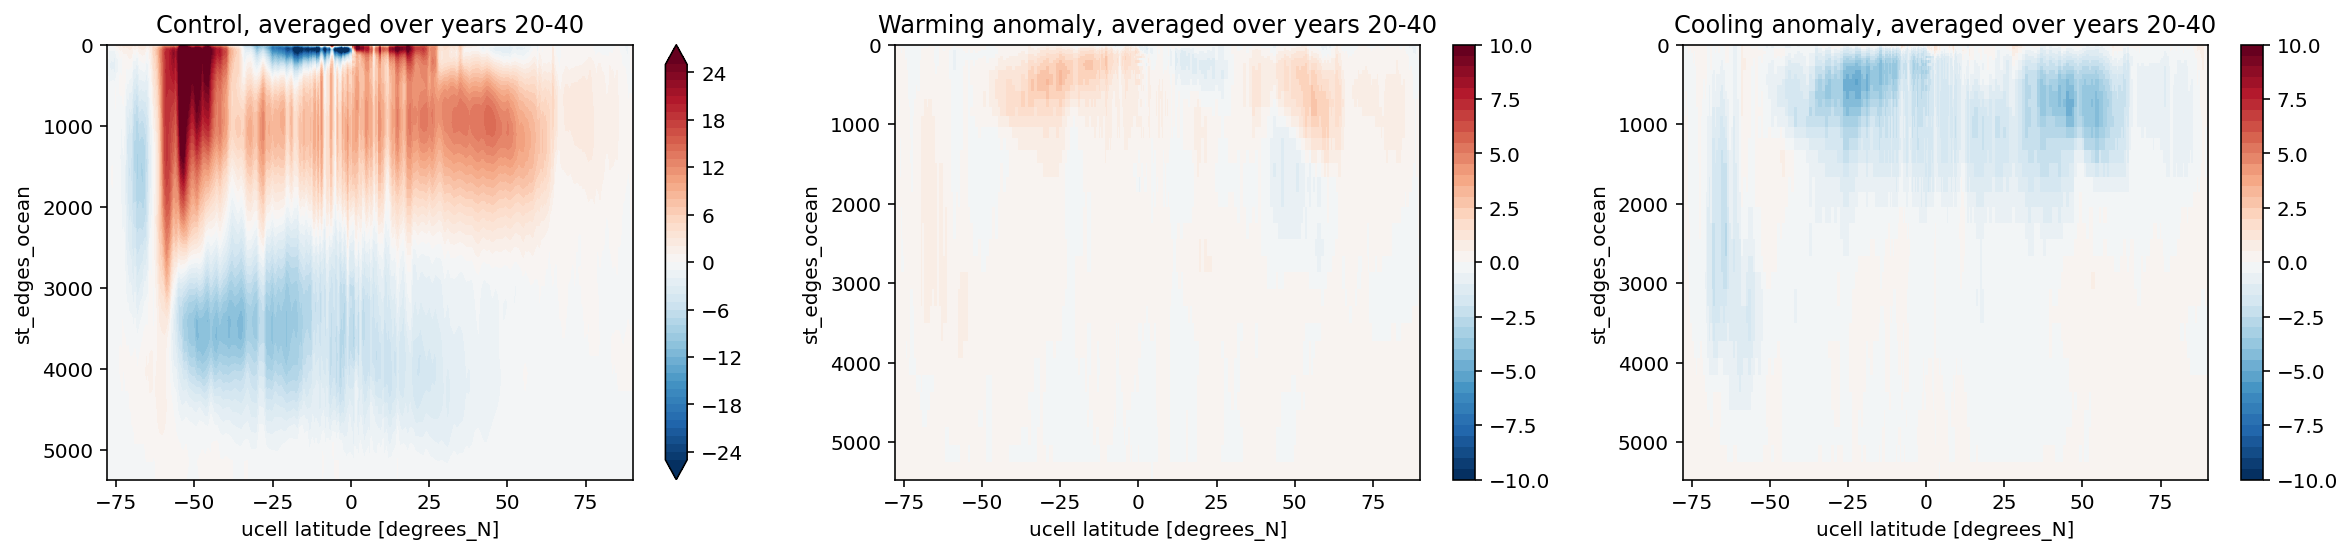

In [54]:
fig, axes = plt.subplots(figsize = (20,4),nrows = 1, ncols = 3)

levels = np.arange(-25,25.1,1)
levels_anomaly = np.arange(-10,10.1,0.5)

(Psi_Eulerian_cont/1e6).sel(time = slice('2920-01-01','2940-12-31')).mean('time').plot.contourf(ax = axes[0], x = 'yu_ocean',levels = levels, cmap = 'RdBu_r', yincrease = False)
((Psi_Eulerian_warm-Psi_Eulerian_cont).sel(time = slice('2920-01-01','2940-12-31')).mean('time')/1e6).plot(ax = axes[1], x = 'yu_ocean', levels = levels_anomaly, cmap = 'RdBu_r', yincrease = False)
((Psi_Eulerian_cool-Psi_Eulerian_cont).sel(time = slice('2920-01-01','2940-12-31')).mean('time')/1e6).plot(ax = axes[2], x = 'yu_ocean', levels = levels_anomaly, cmap = 'RdBu_r', yincrease = False)

axes[0].set_title('Control, averaged over years 20-40')
axes[1].set_title('Warming anomaly, averaged over years 20-40')
axes[2].set_title('Cooling anomaly, averaged over years 20-40')

Text(0.5, 1.0, 'Cooling anomaly, averaged over years 20-40')

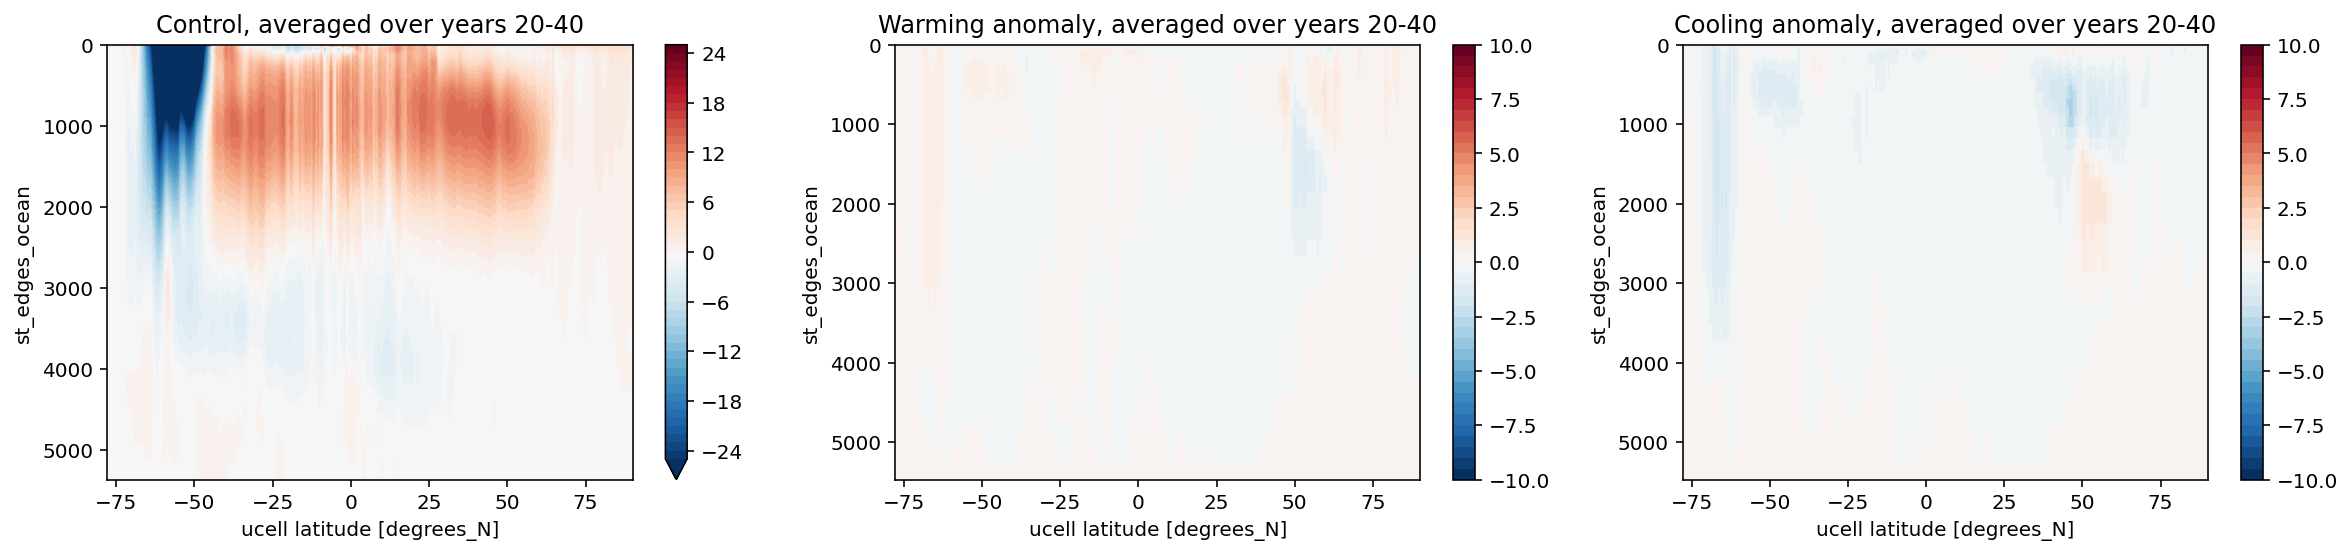

In [45]:
fig, axes = plt.subplots(figsize = (20,4),nrows = 1, ncols = 3)

levels = np.arange(-25,25.1,1)
levels_anomaly = np.arange(-10,10.1,0.5)

(Psi_Eulerian_contNA/1e6).isel(time = 2).plot.contourf(ax = axes[0], x = 'yu_ocean',levels = levels, cmap = 'RdBu_r', yincrease = False)
((Psi_Eulerian_warmNA-Psi_Eulerian_contNA)/1e6).isel(time = 2).plot(ax = axes[1], x = 'yu_ocean', levels = levels_anomaly, cmap = 'RdBu_r', yincrease = False)
((Psi_Eulerian_coolNA-Psi_Eulerian_contNA)/1e6).isel(time = 2).plot(ax = axes[2], x = 'yu_ocean', levels = levels_anomaly, cmap = 'RdBu_r', yincrease = False)

axes[0].set_title('Control, averaged over years 20-40')
axes[1].set_title('Warming anomaly, averaged over years 20-40')
axes[2].set_title('Cooling anomaly, averaged over years 20-40')